In [2020]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd
from geopandas import GeoSeries
import seaborn as sns
from itertools import chain
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
%matplotlib inline
from scipy.stats import pearsonr
import osmnx as ox
from tqdm import tqdm
import geopandas
from geopandas.tools import sjoin

In [2038]:
wards_shape = gpd.read_file('../Data/Geo_Data/wards_london_2016/London-wards-2018_ESRI/London_Ward.shp')

wards_shape = wards_shape.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
wards_shape.head(n=5)

/work/sagarj/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((-0.28409 51.36515, -0.28473 51.36541..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((-0.27257 51.37227, -0.27263 51.37228..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((-0.25873 51.40956, -0.25869 51.40955..."


In [2039]:
data = pd.read_csv('scratchpad/joined_vitaminN_data.csv')

In [2040]:
data.head(n=4)

,Unnamed: 0,GSS_CODE_x,NAME,geometry,green_gsv,green_gsv_null,green_gsv_unweighted,mean_choice,median_choice,std_choice,...,WD17CD,avg_age,Crime_per_capita,Crime_per_capita_flat,street_crime_per_capita,street_crime_per_capita_flat,off_street_crime_per_capita,off_street_crime_per_capita_flat,log_median_income,log_pop_density
0,0,E05000026,Abbey,"POLYGON ((544735.1969169365 184076.4975022489,...",10.524896,10.687261,10.687261,14.176203,13.855123,5.704466,...,E05000026,29.572999,5.408884,223.382046,3.766188,43.215031,2.044388,7.724426,10.431760,9.298016
1,1,E05000027,Alibon,"POLYGON ((547932.4007530108 184916.5970276945,...",10.102674,10.269987,10.269987,9.614580,8.563932,4.634217,...,E05000027,33.568004,4.468538,87.229138,2.221466,9.220839,1.253882,3.503919,10.388072,9.000970
2,2,E05000028,Becontree,"POLYGON ((546209.3973532255 185783.5988516255,...",10.891959,11.220406,11.220406,12.623284,13.285051,6.332820,...,E05000028,32.032693,4.420536,83.140878,1.966401,7.144919,1.221429,3.392032,10.404263,9.329230
3,3,E05000029,Chadwell Heath,"POLYGON ((548874.2011037983 188496.3023516422,...",16.489458,16.415619,16.415619,8.776464,9.297543,5.033655,...,E05000029,36.004793,4.604248,99.907834,2.297966,9.953917,1.547661,4.700461,10.431760,8.039253


In [2041]:
data_geo = pd.merge(wards_shape,data,left_on='GSS_CODE',right_on='GSS_CODE_x' ).copy()
data_geo = geopandas.GeoDataFrame(data_geo, geometry='geometry_x', crs={'init': 'epsg:27700'})

In [2044]:
# data_geo

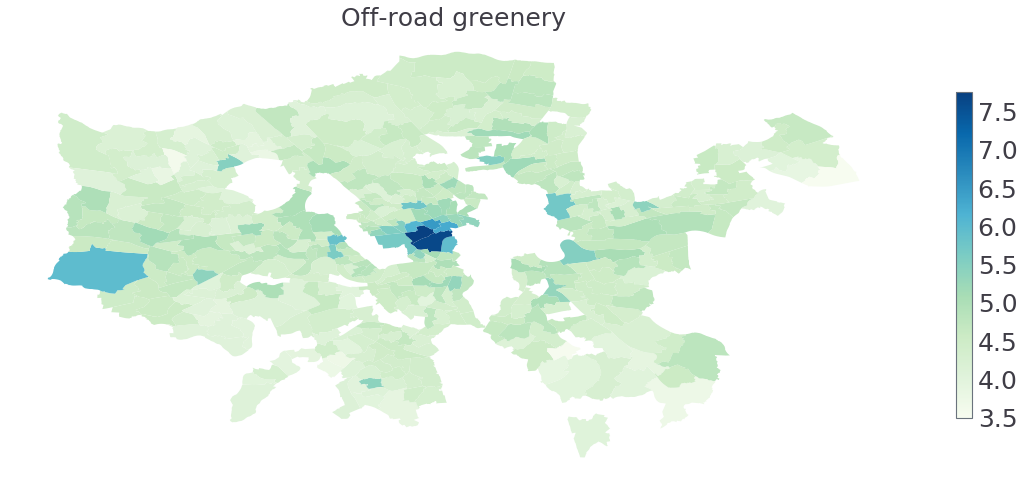

In [2043]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
ax.axis('off')
ax.set_title('Off-road greenery', fontdict={'fontsize': '25', 'fontweight' : '500'})
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=data_geo['Crime_per_capita'].min(), vmax=data_geo['Crime_per_capita'].max()))
#empty array for the data range
sm._A = []
#add the colorbar to the figure
cbar = fig.colorbar(sm,shrink=0.3)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(25)
data_geo.plot(ax=ax,column='Crime_per_capita', cmap='GnBu', linewidth=0.8)

In [1703]:
data.describe()

,Unnamed: 0,green_gsv,green_gsv_null,green_gsv_unweighted,mean_choice,median_choice,std_choice,green_gsv_choice_median,area_sqkm,ward_green_contribution,...,off_street_crime,avg_age,Crime_per_capita,Crime_per_capita_flat,street_crime_per_capita,street_crime_per_capita_flat,off_street_crime_per_capita,off_street_crime_per_capita_flat,log_median_income,log_pop_density
count,424.00000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,211.50000,18.732742,18.986386,18.986386,10.839332,10.419152,6.447984,142.658104,2.639777,0.001608,...,65.976415,36.270920,4.545233,112.820073,2.162380,16.007749,1.407470,4.720537,10.559979,8.793150
std,122.54251,5.330133,5.302440,5.302440,3.821976,3.858434,1.996211,66.515902,2.331638,0.000458,...,48.421704,2.867230,0.468397,157.308303,0.839121,54.257202,0.497701,3.698638,0.179495,0.669259
min,0.00000,5.672061,5.926372,5.926372,3.731606,3.124783,0.000000,17.859320,0.442690,0.000487,...,13.000000,28.666428,3.487835,32.715035,0.339076,1.403649,0.017303,1.017453,10.158130,6.235281
25%,105.75000,15.107000,15.248816,15.248816,8.237159,7.739060,5.208854,93.952487,1.328772,0.001297,...,39.000000,34.146399,4.279162,72.179961,1.628414,5.095820,1.076684,2.934934,10.418030,8.390375
50%,211.50000,18.201573,18.608513,18.608513,10.222661,9.892815,6.000566,130.963215,1.988380,0.001563,...,55.000000,36.009644,4.480074,88.241171,2.045176,7.730522,1.387801,4.006032,10.555683,8.785514
75%,317.25000,22.164885,22.407663,22.407663,12.179578,11.669056,7.195846,176.111212,3.234250,0.001903,...,79.000000,38.159487,4.710858,111.147547,2.545423,12.748823,1.686654,5.401392,10.689385,9.271877
max,423.00000,36.020064,36.020064,36.020064,31.242662,28.864394,18.620241,411.677900,23.521170,0.003092,...,559.000000,43.763403,7.752429,2327.217384,6.676376,793.438742,3.938856,51.359794,11.388835,10.257264


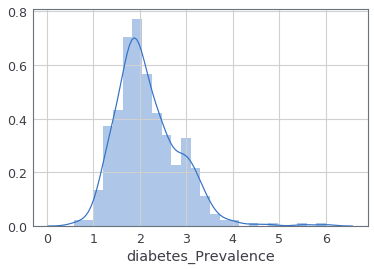

In [1704]:
sns.distplot(data['diabetes_Prevalence'])

In [1797]:
depression = pd.read_csv('scratchpad/depression_V3.csv.gz',compression='gzip')

In [1798]:
diabetes = pd.read_csv('scratchpad/diabetes_V4.csv.gz',compression='gzip')

In [1799]:
opioids = pd.read_csv('scratchpad/opioids_V4.csv.gz',compression='gzip')

In [1800]:
depression.head(n=5)

,YYYYMM,LSOA_CODE,Total_quantity,Dosage_ratio,Total_cost,Total_items,Patient_count
0,201501,E01012190,2647.223095,15729.656147,238.528242,66.555919,1414.0
1,201501,E01012191,3052.881541,18440.164166,285.660711,76.737818,1618.0
2,201501,E01012192,2923.704924,20331.821985,268.766295,74.816614,1511.0
3,201501,E01012194,2786.496818,18599.386351,254.218098,70.646940,1480.0
4,201501,E01012195,3040.342485,20827.549157,278.044163,77.286895,1624.0


In [1801]:
hypertension = pd.read_csv('scratchpad/hypertension_V3.csv.gz',compression='gzip')

In [1802]:
wards = pd.read_csv('scratchpad/Wards.csv')

In [1803]:
wards.head()

,Unnamed: 0,LSOA11CD,WD15CD,WD15NM,LAD15CD,LocalAuthorityName,CityName
0,0,E01000104,E05000041,Village,E09000002,Barking and Dagenham,London
1,1,E01000105,E05000041,Village,E09000002,Barking and Dagenham,London
2,2,E01000106,E05000041,Village,E09000002,Barking and Dagenham,London
3,3,E01000107,E05000041,Village,E09000002,Barking and Dagenham,London
4,4,E01000108,E05000041,Village,E09000002,Barking and Dagenham,London


In [1804]:
london_LSOAs = wards[wards['CityName'] == 'London']

In [1805]:
London_dep = depression[depression['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [1806]:
London_hyp = hypertension[hypertension['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [1807]:
London_dm = diabetes[diabetes['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [1808]:
London_op = opioids[opioids['LSOA_CODE'].isin(london_LSOAs['LSOA11CD'])]

In [1809]:
len(London_dep) , len(London_hyp), len(London_dm), len(London_op)

(356162, 356162, 356162, 356162)

In [1810]:
London_dep = London_dep[(London_dep['YYYYMM']>=201601 ) & (London_dep['YYYYMM'] <= 201612)]

In [1811]:
London_hyp = London_hyp[(London_hyp['YYYYMM']>201601 ) & (London_hyp['YYYYMM'] < 201612)]

In [1812]:
London_dm = London_dm[(London_dm['YYYYMM']>201601 ) & (London_dm['YYYYMM'] < 201612)]

In [1813]:
London_op = London_op[(London_op['YYYYMM']>201601 ) & (London_op['YYYYMM'] < 201612)]

In [1814]:
def createAggregate(df, wards, prefix= '',dosageField = 'Dosage_ratio'):
    merged = pd.merge(df , wards , left_on='LSOA_CODE' , right_on='LSOA11CD')
    ward_level = {'Ward_code':[],prefix + '_Presc_per_capita' :[] , prefix+'_Dosage_per_capita':[]}
    for name , group in merged.groupby('WD15CD'):
        ward_level['Ward_code'].append(name)
        ward_level[prefix + '_Presc_per_capita'].append(np.median(group['Total_items']/group['Patient_count'])*1000)
        ward_level[prefix + '_Dosage_per_capita'].append(np.median(group[dosageField]/group['Patient_count'])*1000)
    return pd.DataFrame.from_dict(ward_level)

In [1815]:
ward_hyp = createAggregate(London_hyp,london_LSOAs,prefix = 'hyp')
ward_dm = createAggregate(London_dm,london_LSOAs,prefix = 'dm')
ward_dep = createAggregate(London_dep,london_LSOAs,prefix = 'dep')
ward_op = createAggregate(London_op,london_LSOAs,prefix = 'op' , dosageField = 'OME')

In [1816]:
ward_op

,Ward_code,op_Presc_per_capita,op_Dosage_per_capita
0,E05000026,4.013160,22958.670021
1,E05000027,8.871328,6837.442662
2,E05000028,12.140296,11330.944428
3,E05000029,15.395446,19350.848484
4,E05000030,15.934547,12083.666535
...,...,...,...
626,E05009401,0.537850,366.632680
627,E05009402,0.952384,786.233762
628,E05009403,4.509773,3370.329375
629,E05009404,0.397665,248.329159


In [1817]:
london_life = pd.read_csv('scratchpad/life_scores_london_wards.csv')

In [1818]:
london_life.rename(columns={'New ward code':'WardCode' , 'Subjective well-being average score, 2013' : 'Wellbeing' , 'Homes with access to open space & nature, and % greenspace - 2013':'Green Access' , 
                            'Public Transport Accessibility - 2013' : 'Transport Access' , 'Crime rate - 2013': 'Crime rate' , 'Childhood Obesity 2013' : 'Childhood obesity'
                           },inplace=True)

In [1819]:
london_life.head()

,WardCode,Wellbeing,Green Access,Transport Access,Crime rate,Childhood obesity
0,E09000001,7.7,-6.5,7.9,14.0,28.8
1,E05000026,7.8,-0.9,6.0,120.8,23.2
2,E05000027,7.6,-1.8,3.1,93.2,25.6
3,E05000028,7.6,-5.5,2.9,104.7,28.4
4,E05000029,7.6,2.0,2.3,83.7,28.8


In [1820]:
london_life.to_csv('scratchpad/London_life_scores.csv')

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc3c96ecc0>,
      dtype=object)

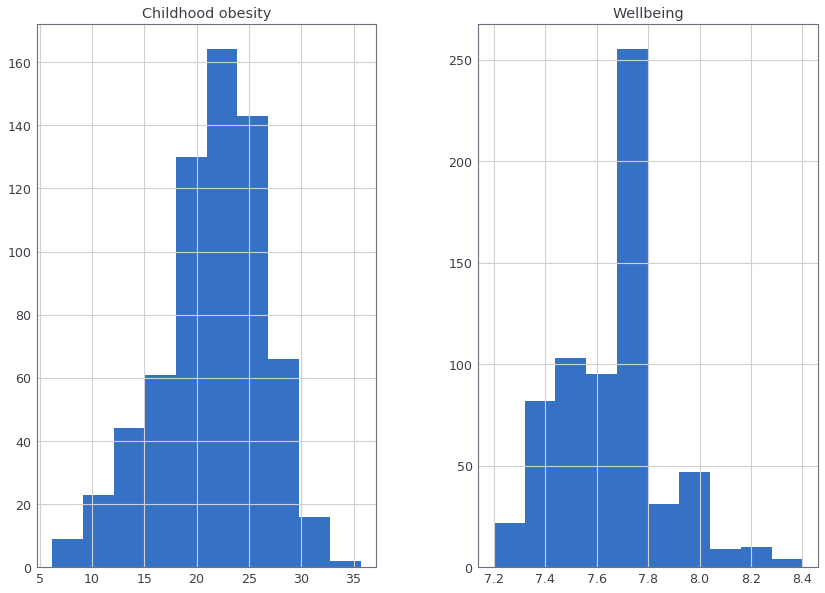

In [1821]:

fig = plt.figure(figsize = (14,10))
ax = fig.gca()
london_life[['Childhood obesity', 'Wellbeing']].hist(ax = ax , bins=10)

7.2 8.4 7.7 7.6679331306990886 0.20969433920170139


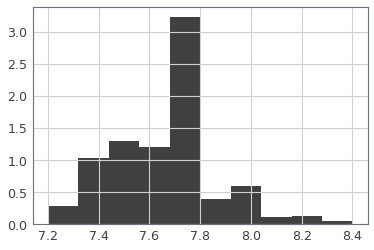

In [1822]:
x = london_life['Wellbeing']
plt.grid(True)
n, bins, patches = plt.hist(x , 10, density=True, facecolor='black', alpha=0.75)
print(np.min(x), np.max(x) ,  np.median(x), np.mean(x), np.std(x))

plt.show()

In [1823]:
# sns.distplot(ward_hyp['hyp_Presc_per_capita'])

In [1824]:
# sns.distplot(ward_dm['dm_Presc_per_capita'])

6.2 35.7 22.2 21.573100303951367 4.9483800234218585


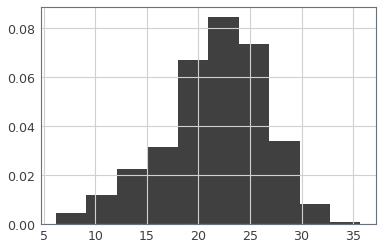

In [1825]:
x = london_life['Childhood obesity']
n, bins, patches = plt.hist(x , 10, density=True, facecolor='black', alpha=0.75)
print(np.min(x), np.max(x) ,  np.median(x), np.mean(x), np.std(x))
plt.grid(True)
plt.show()

In [1826]:
data.columns

Index(['Unnamed: 0', 'GSS_CODE_x', 'NAME', 'geometry', 'green_gsv',
       'green_gsv_null', 'green_gsv_unweighted', 'mean_choice',
       'median_choice', 'std_choice', 'green_gsv_choice_median', 'area_sqkm',
       'ward_green_contribution', 'gsv_tree_score', 'green_gsv_scaled',
       'green_gsv_unweighted_scaled', 'green_gsv_null_scaled',
       'green_gsv_bland_average_scaled', 'green_gsv_choice_median_scaled',
       'green_sat', 'green_sat_choice_median', 'green_sat_null',
       'green_sat_unweighted', 'ward_sat_green_contribution', 'ward_code',
       'ward_area', 'percent_on_road_sat_green_area', 'percent_tot_sat_green',
       'sat_all_ward_green', 'green_area', 'sat_ward_green_contribution',
       'on_vs_off_green_ratio', 'on_vs_off_green_ratio_scaled',
       'sat_all_ward_green_scaled', 'Ward Code', 'Population',
       'Working age population', 'IMD average score', 'Income score',
       'Employment score', 'IDACI score', 'IDAOPI score', 'GSS_CODE_y',
       'Median 201

In [1827]:
# sns.distplot(ward_dep['dep_Presc_per_capita'])

In [1828]:
data_merged = pd.merge(data ,ward_hyp , left_on='GSS_CODE_x' , right_on='Ward_code' )
data_merged = pd.merge(data_merged ,ward_dm , left_on='GSS_CODE_x' , right_on='Ward_code' )
data_merged = pd.merge(data_merged ,ward_dep , left_on='GSS_CODE_x' , right_on='Ward_code' )
data_merged = pd.merge(data_merged ,ward_op , left_on='GSS_CODE_x' , right_on='Ward_code' )
data_merged = pd.merge(data_merged ,london_life , left_on='GSS_CODE_x' , right_on='WardCode' )

In [1829]:
house_price = pd.read_csv('scratchpad/land-registry-house-prices-ward.csv')
house_price = house_price[house_price['Year'] == 'Year ending Dec 2017']
house_price = house_price[house_price['Measure'] == 'Median']
pointless = house_price[house_price['Value'] == '-']
house_price = house_price.drop(pointless.index)
house_price['Value'] = house_price['Value'].apply(lambda x : int(x.replace(',','')))
house_price.head(n=2)

,Code,Ward_name,Borough,Year,Measure,Value
55441,E05000026,Abbey,Barking and Dagenham,Year ending Dec 2017,Median,231000
55442,E05000027,Alibon,Barking and Dagenham,Year ending Dec 2017,Median,295000


In [1830]:
house_price = house_price.rename(columns={'Value':'Median_house_price'})
data_merged = pd.merge(data_merged ,house_price , left_on='GSS_CODE_x' , right_on='Code' )

In [1831]:
beauty1= pd.read_csv('scratchpad/wards_beauty_score.csv')
beauty2 = pd.read_csv('scratchpad/London_ward_beauty_combined.csv')
beauty_total = pd.merge(beauty2, beauty1, left_on='NAME', right_on='ward_name')

In [1832]:
len(beauty_total)

649

In [1833]:
beauty_sub = beauty2[['CODE' , 'NAME' , 'bscore']].copy()
beauty_sub.rename(columns={'CODE':'Ward_code', 'NAME' :'Ward_name' , 'bscore':'FaceLift_beauty_score'},inplace=True)
beauty_sub.head(n=4)

,Ward_code,Ward_name,FaceLift_beauty_score
0,E05009308,Portsoken Ward,0.166667
1,E05009306,Langbourn Ward,0.166667
2,E05009312,Walbrook Ward,0.166667
3,E05000068,Brampton Ward,0.253333


In [1834]:
beauty_sub.to_csv('scratchpad/London_beauty.csv')

In [1835]:
pearsonr(beauty_total['bscore_x'], beauty_total['bscore_y'])

(1.0, 0.0)

In [1836]:
beauty_sub = beauty_total[['CODE','bscore_x']]

data_merged = pd.merge(data_merged ,house_price , left_on='GSS_CODE_x' , right_on='Code' )


In [1837]:
data_merged = pd.merge(data_merged ,beauty_sub , left_on='GSS_CODE_x' , right_on='CODE' )

In [1838]:
IMD_parent = pd.read_csv('scratchpad/london_ward_imd_measures.csv')
IMD_parent.columns

Index(['Ward Code', 'Ward Name', 'Borough', 'Population',
       'Working age population', 'Child population', '16-59 population',
       'Old age population', 'IMD Extent %', 'IMD Extent Rank',
       'IMD Average rank', 'IMD average rank rank', 'IMD average score',
       'IMD average score rank', 'Rank of worst LSOA', 'Worst LSOA Code',
       'Worst LSOA: % of resident in ward', 'Number of LSOAs',
       '# LSOAs in worst 5%', '# LSOAs in worst 10%', '# LSOAs in worst 20%',
       '# LSOAs in worst 50%', 'Income scale', 'Income score', 'Income rank',
       'Employment scale', 'Employment score', 'Employment rank',
       'IDACI scale', 'IDACI score', 'IDACI score rank', 'IDAOPI scale',
       'IDAOPI score', 'IDAOPI score (rank)'],
      dtype='object')

In [1839]:
IMD_sub = IMD_parent[['Ward Code','IMD average score','Income score','Employment score','IDACI score','IDAOPI score']]

In [1840]:
IMD_sub.head()

,Ward Code,IMD average score,Income score,Employment score,IDACI score,IDAOPI score
0,E05000026,31.3,0.189,0.093,0.235,0.351
1,E05000027,35.4,0.215,0.137,0.257,0.275
2,E05000028,35.3,0.207,0.126,0.249,0.295
3,E05000029,32.1,0.190,0.122,0.243,0.225
4,E05000030,25.3,0.153,0.100,0.216,0.193


In [1841]:
data_merged.columns

Index(['Unnamed: 0', 'GSS_CODE_x', 'NAME', 'geometry', 'green_gsv',
       'green_gsv_null', 'green_gsv_unweighted', 'mean_choice',
       'median_choice', 'std_choice', 'green_gsv_choice_median', 'area_sqkm',
       'ward_green_contribution', 'gsv_tree_score', 'green_gsv_scaled',
       'green_gsv_unweighted_scaled', 'green_gsv_null_scaled',
       'green_gsv_bland_average_scaled', 'green_gsv_choice_median_scaled',
       'green_sat', 'green_sat_choice_median', 'green_sat_null',
       'green_sat_unweighted', 'ward_sat_green_contribution', 'ward_code',
       'ward_area', 'percent_on_road_sat_green_area', 'percent_tot_sat_green',
       'sat_all_ward_green', 'green_area', 'sat_ward_green_contribution',
       'on_vs_off_green_ratio', 'on_vs_off_green_ratio_scaled',
       'sat_all_ward_green_scaled', 'Ward Code', 'Population',
       'Working age population', 'IMD average score', 'Income score',
       'Employment score', 'IDACI score', 'IDAOPI score', 'GSS_CODE_y',
       'Median 201

In [1842]:
len(data_merged)

423

304.94058768351607 113764.59689800642 35216.608063579384 37468.283496405464 22249.863549780875


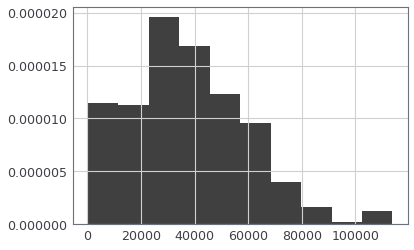

In [1847]:
x = data_merged['dm_Presc_per_capita']*1000
n, bins, patches = plt.hist(x , 10, density=True, facecolor='black', alpha=0.75)
print(np.min(x), np.max(x) ,  np.median(x), np.mean(x), np.std(x))
plt.grid(True)
plt.show()

174.81273816721608 26991.04594556044 8928.629549997191 8900.641670205228 4578.254503725059


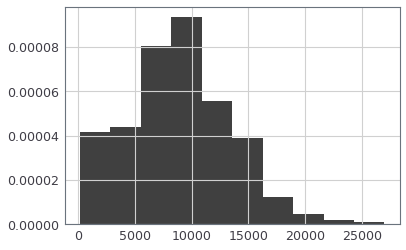

In [1846]:
x = data_merged['op_Presc_per_capita']*1000
n, bins, patches = plt.hist(x , 10, density=True, facecolor='black', alpha=0.75)
print(np.min(x), np.max(x) ,  np.median(x), np.mean(x), np.std(x))
plt.grid(True)
plt.show()

28.66642759493294 43.763402987237995 36.004792627145626 36.26074387995595 2.8595638226734827


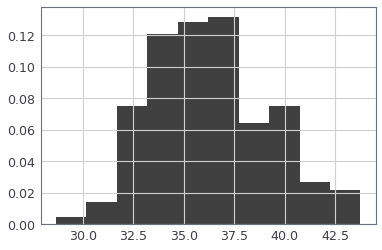

In [1751]:
x = data_merged['avg_age']
n, bins, patches = plt.hist(x , 10, density=True, facecolor='black', alpha=0.75)
print(np.min(x), np.max(x) ,  np.median(x), np.mean(x), np.std(x))
plt.grid(True)
plt.show()

31.48148148148148 93.33333333333333 63.85542168674698 63.48563034845729 13.229211872188943


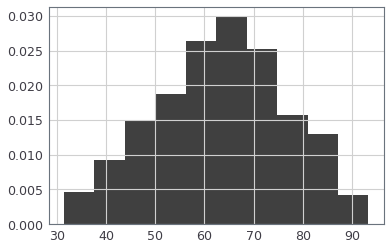

In [1752]:
x = data_merged['bscore_x']*100
n, bins, patches = plt.hist(x , 10, density=True, facecolor='black', alpha=0.75)
print(np.min(x), np.max(x) ,  np.median(x), np.mean(x), np.std(x))
plt.grid(True)

5.0 45.3 20.6 20.820567375886526 8.511226220827613


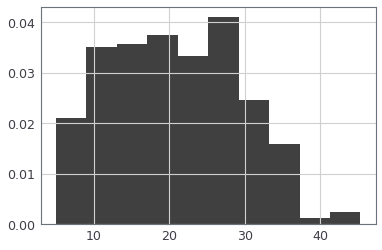

In [1848]:
x = data_merged['IMD average score']
n, bins, patches = plt.hist(x , 10, density=True, facecolor='black', alpha=0.75)
print(np.min(x), np.max(x) ,  np.median(x), np.mean(x), np.std(x))
plt.grid(True)

In [1849]:
data_merged = data_merged.rename(columns={'bscore_x':'beauty_score' , 'Median_house_price_x' : 'Median_house_price' , 'IMD average score':'IMD_avg'})

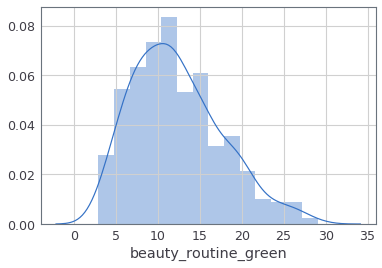

In [1850]:
data_merged['beauty_routine_green'] = data_merged['beauty_score'] * data_merged['green_gsv']

sns.distplot(data_merged['beauty_routine_green'])

In [1851]:
data_merged['Median_house_price'] = np.log(data_merged['Median_house_price'])

In [1852]:
features_ztransform = ['Crime_per_capita','off_street_crime_per_capita','street_crime_per_capita','green_gsv','mean_choice','median_choice','sat_all_ward_green','Population_per_square_kilometre','IMD_avg', 'Wellbeing','Childhood obesity' ,
                       'Income score','Median 2012/13','diabetes_Prevalence','hyp_Presc_per_capita', 'dm_Presc_per_capita', 'dep_Presc_per_capita','op_Presc_per_capita' ,'log_median_income','log_pop_density' , 'avg_age', 'beauty_score' ,'beauty_routine_green' ,'Median_house_price']
data_analysis = data_merged[features_ztransform].copy()
for k in features_ztransform:
    data_analysis[k] = (data_analysis[k] - data_analysis[k].mean())/data_analysis[k].std(ddof=0)

In [1853]:
data_analysis['on_road_bins'] = pd.qcut(data_analysis['green_gsv'],10)

In [1854]:
cats , bins= pd.qcut(x=(data_merged['green_gsv']), q=10, retbins=True)
print(bins)
routine_bins_labels = []
for b in range(len(bins) -1 ):
    label = str(bins[b])[:4] + ' - ' + str(bins[b+1])[:3]
    routine_bins_labels.append(label)
print(routine_bins_labels)

[ 5.67206052 12.17151063 14.05087129 15.74130719 17.03687237 18.18352564
 19.59527828 21.29715695 23.17238781 25.80640423 33.37635678]
['5.67 - 12.', '12.1 - 14.', '14.0 - 15.', '15.7 - 17.', '17.0 - 18.', '18.1 - 19.', '19.5 - 21.', '21.2 - 23.', '23.1 - 25.', '25.8 - 33.']


In [1855]:
data_analysis['off_road_bins'] = pd.qcut(data_analysis['sat_all_ward_green'],10)

In [1856]:
cats , bins= pd.qcut(x=(data_merged['sat_all_ward_green_scaled']), q=10, retbins=True)
print(bins)
offTrack_bins_labels = []
for b in range(len(bins) -1 ):
    label = str(bins[b])[:4] + ' - ' + str(bins[b+1])[:3]
    offTrack_bins_labels.append(label)
print(offTrack_bins_labels)

[ 0.         17.04820813 23.77777137 30.04684292 35.09419205 40.13387424
 43.64263461 47.79135815 56.04950897 66.68810038 91.43305719]
['0.0 - 17.', '17.0 - 23.', '23.7 - 30.', '30.0 - 35.', '35.0 - 40.', '40.1 - 43.', '43.6 - 47.', '47.7 - 56.', '56.0 - 66.', '66.6 - 91.']


In [1857]:
data_analysis['beauty_bins'] = pd.qcut(data_analysis['beauty_score'],10)

In [1858]:
cats , bins= pd.qcut(x=(data_merged['beauty_score']), q=10, retbins=True)
print(bins)
beauty_bins_labels = []
for b in range(len(bins) -1 ):
    label = str(bins[b])[:4] + ' - ' + str(bins[b+1])[:3]
    beauty_bins_labels.append(label)
print(beauty_bins_labels)

[0.31481481 0.45140931 0.5209507  0.56646647 0.61282258 0.63855422
 0.67508772 0.70844695 0.7494012  0.81226415 0.93333333]
['0.31 - 0.4', '0.45 - 0.5', '0.52 - 0.5', '0.56 - 0.6', '0.61 - 0.6', '0.63 - 0.6', '0.67 - 0.7', '0.70 - 0.7', '0.74 - 0.8', '0.81 - 0.9']


In [1859]:
data_analysis['on_road_beauty_bins'] = pd.qcut(data_analysis['beauty_routine_green'],10)

In [1860]:
cats , bins= pd.qcut(x=(data_merged['beauty_routine_green']), q=10, retbins=True)
print(bins)
beauty_routine_bins_labels = []
for b in range(len(bins) -1 ):
    label = str(bins[b])[:4] + ' - ' + str(bins[b+1])[:3]
    beauty_routine_bins_labels.append(label)
print(beauty_routine_bins_labels)

[ 2.94385686  6.00586519  7.70196839  8.88553162 10.27320138 11.70510894
 12.82311891 14.70871778 16.62650557 19.59777848 29.08777462]
['2.94 - 6.0', '6.00 - 7.7', '7.70 - 8.8', '8.88 - 10.', '10.2 - 11.', '11.7 - 12.', '12.8 - 14.', '14.7 - 16.', '16.6 - 19.', '19.5 - 29.']


In [1861]:
data_analysis['income_bin'] = pd.qcut(data_analysis['log_median_income'],10)
data_analysis['density_bin'] = pd.qcut(data_analysis['log_pop_density'],10)

In [1862]:
road_stats = {}
for name , group in data_analysis.groupby('on_road_bins'):
    road_stats[name] = {}
    road_stats[name]['diabetes_prevalence'] = np.mean(group['dm_Presc_per_capita'])
    road_stats[name]['diabetes_error'] = np.std(group['dm_Presc_per_capita'])/np.sqrt(len(group))
    road_stats[name]['hypertension_prevalence'] = np.mean(group['hyp_Presc_per_capita'])
    road_stats[name]['hypertension_error'] = np.std(group['hyp_Presc_per_capita'])/np.sqrt(len(group))
    road_stats[name]['depression_prevalence'] = np.mean(group['dep_Presc_per_capita'])
    road_stats[name]['depression_error'] = np.std(group['dep_Presc_per_capita'])/np.sqrt(len(group))

    road_stats[name]['crime_per_capita'] = np.mean(group['Crime_per_capita'])
    road_stats[name]['crime_error'] = np.std(group['Crime_per_capita'])/np.sqrt(len(group))
    road_stats[name]['street_crime_per_capita'] = np.mean(group['street_crime_per_capita'])
    road_stats[name]['street_crime_error'] = np.std(group['street_crime_per_capita'])/np.sqrt(len(group))
    road_stats[name]['off_street_crime_per_capita'] = np.mean(group['off_street_crime_per_capita'])
    road_stats[name]['off_street_crime_error'] = np.std(group['off_street_crime_per_capita'])/np.sqrt(len(group))
    
    road_stats[name]['beauty'] = np.mean(group['beauty_score'])
    road_stats[name]['beauty_error'] = np.std(group['beauty_score'])/np.sqrt(len(group))
    road_stats[name]['house_price'] = np.mean(group['Median_house_price'])
    road_stats[name]['house_price_error'] = np.std(group['Median_house_price'])/np.sqrt(len(group))
    road_stats[name]['IMD_avg'] = np.mean(group['IMD_avg'])
    road_stats[name]['IMD_avg_error'] = np.std(group['IMD_avg'])/np.sqrt(len(group))
    
    road_stats[name]['Wellbeing_avg'] = np.mean(group['Wellbeing'])
    road_stats[name]['Wellbeing_error'] = np.std(group['Wellbeing'])/np.sqrt(len(group))
    road_stats[name]['CH_obesity_avg'] = np.mean(group['Childhood obesity'])
    road_stats[name]['CH_obesity_error'] = np.std(group['Childhood obesity'])/np.sqrt(len(group))
    road_stats[name]['opioid_avg'] = np.mean(group['op_Presc_per_capita'])
    road_stats[name]['opioid_error'] = np.std(group['op_Presc_per_capita'])/np.sqrt(len(group))

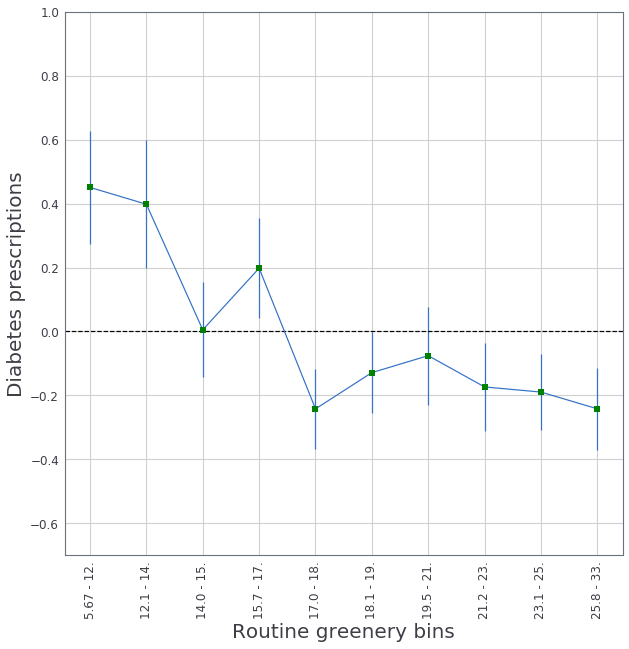

In [1863]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['diabetes_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['diabetes_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine greenery bins' , fontsize = 20)
plt.ylabel('Diabetes prescriptions',fontsize = 20)
plt.show()

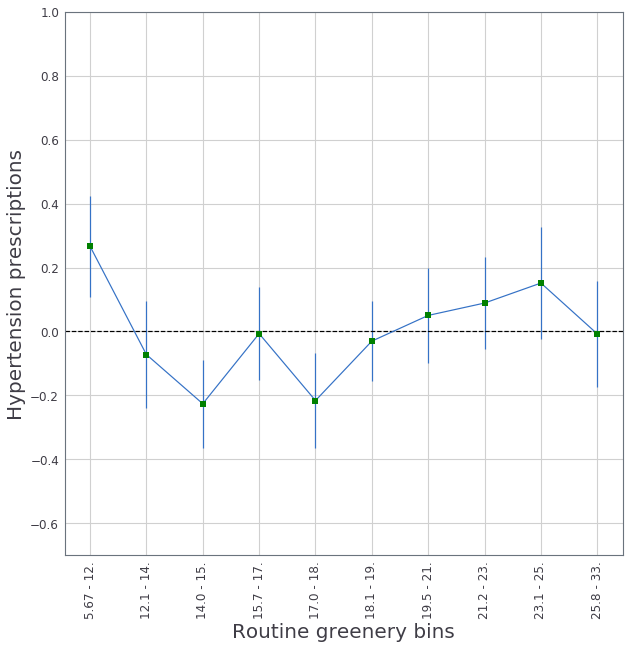

In [1864]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['hypertension_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['hypertension_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine greenery bins' , fontsize = 20)
plt.ylabel('Hypertension prescriptions',fontsize = 20)
plt.show()

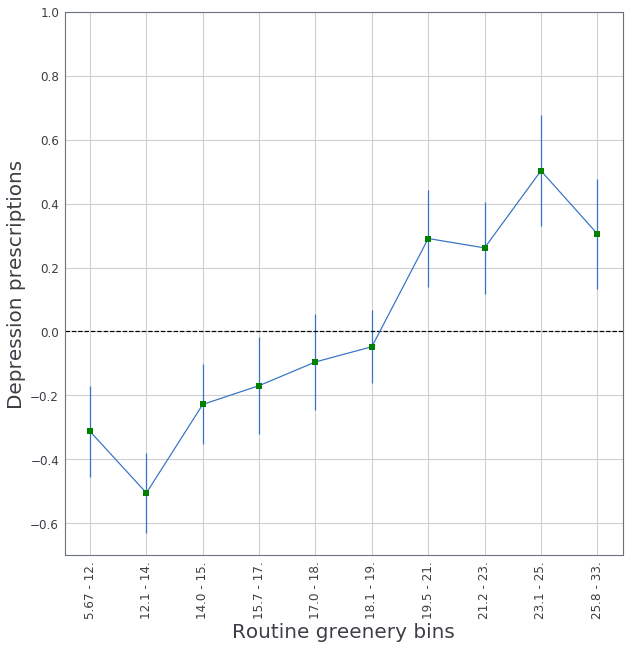

In [1865]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['depression_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['depression_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine greenery bins' , fontsize = 20)
plt.ylabel('Depression prescriptions',fontsize = 20)
plt.show()

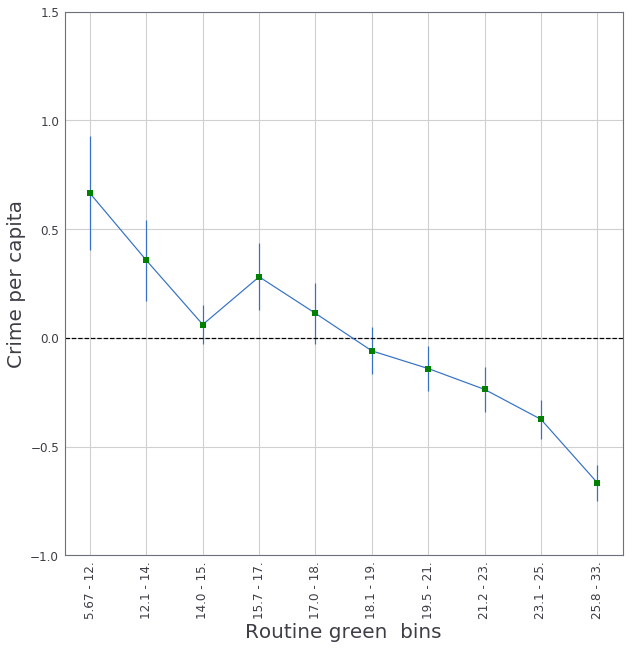

In [1866]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['crime_per_capita'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['crime_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.0, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Crime per capita',fontsize = 20)
plt.show()

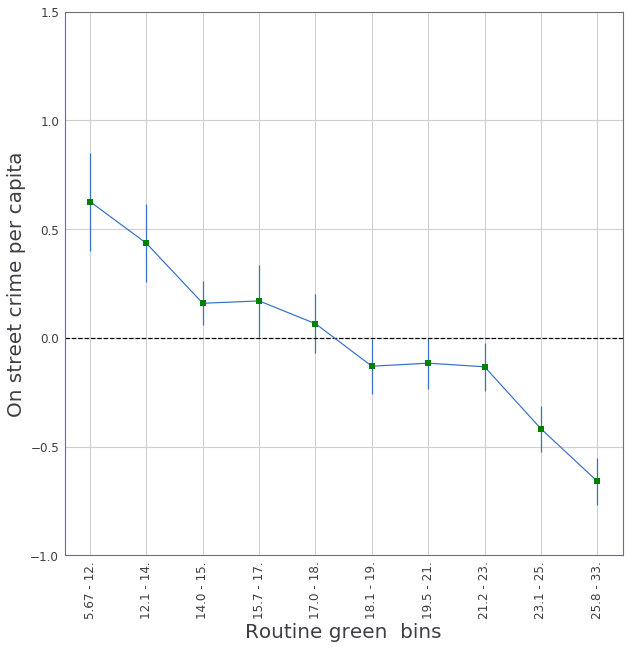

In [1867]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['street_crime_per_capita'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['street_crime_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.0, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('On street crime per capita',fontsize = 20)
plt.show()

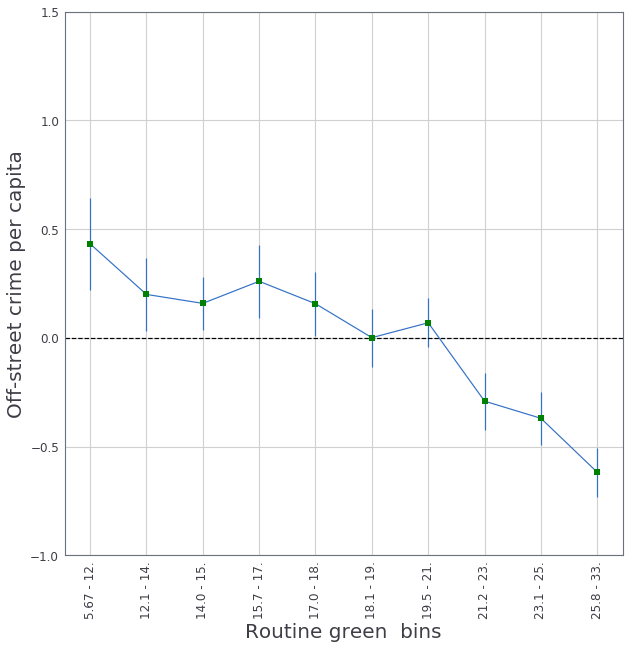

In [1868]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['off_street_crime_per_capita'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['off_street_crime_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.0, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Off-street crime per capita',fontsize = 20)
plt.show()

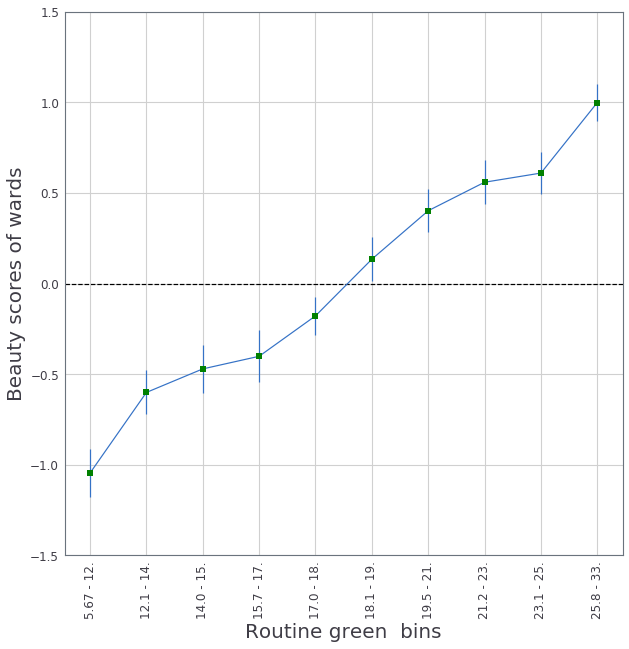

In [1869]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['beauty'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['beauty_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Beauty scores of wards',fontsize = 20)
plt.show()

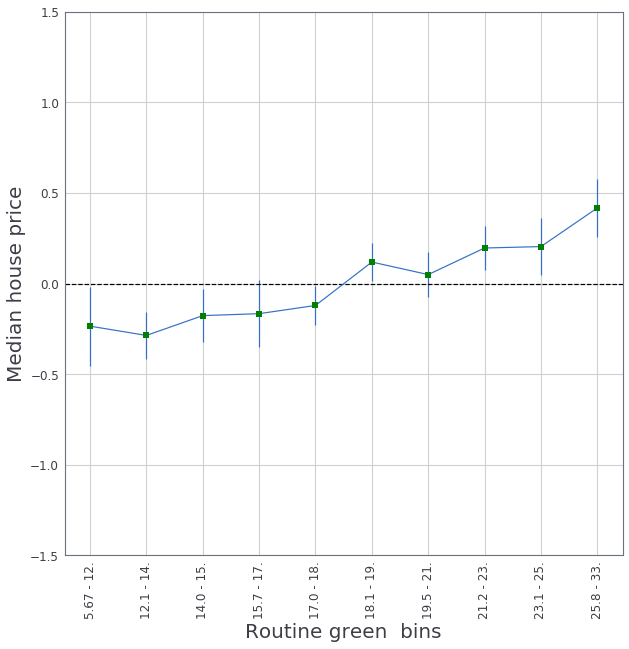

In [1870]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['house_price'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['house_price_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Median house price',fontsize = 20)
plt.show()

Text(0, 0.5, 'Average IMD score')

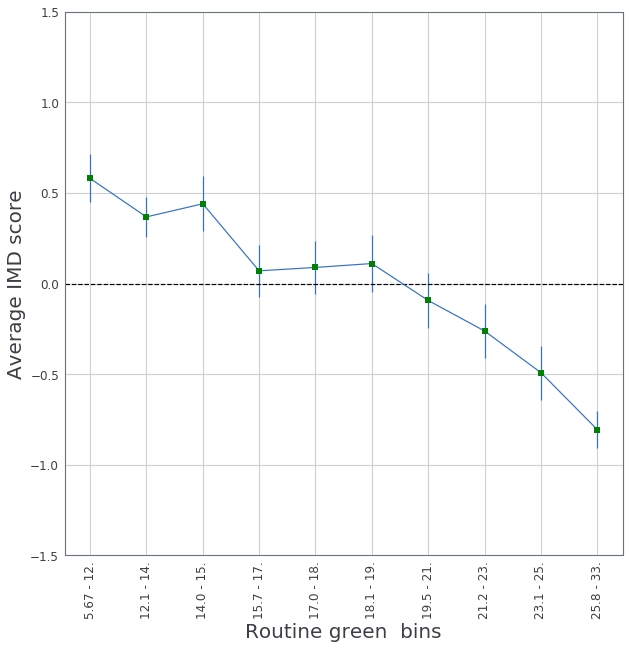

In [1871]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['IMD_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['IMD_avg_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Average IMD score',fontsize = 20)

Text(0, 0.5, 'Average Subjective wellbeing')

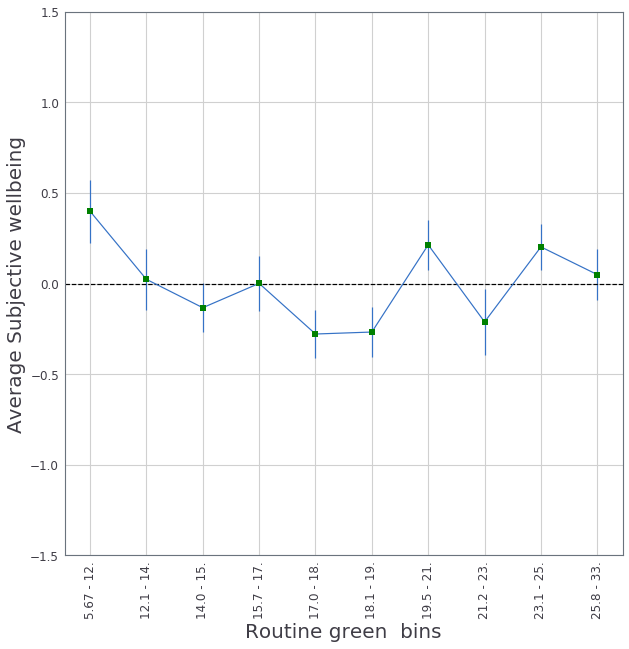

In [1872]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['Wellbeing_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['Wellbeing_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Average Subjective wellbeing',fontsize = 20)

Text(0, 0.5, 'Childhood obesity rates')

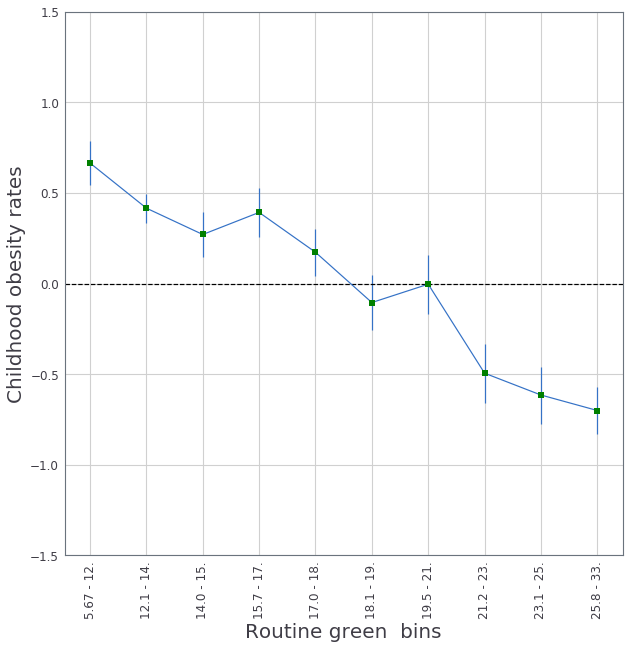

In [1873]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['CH_obesity_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['CH_obesity_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Childhood obesity rates',fontsize = 20)

Text(0, 0.5, 'Opioid prescriptions')

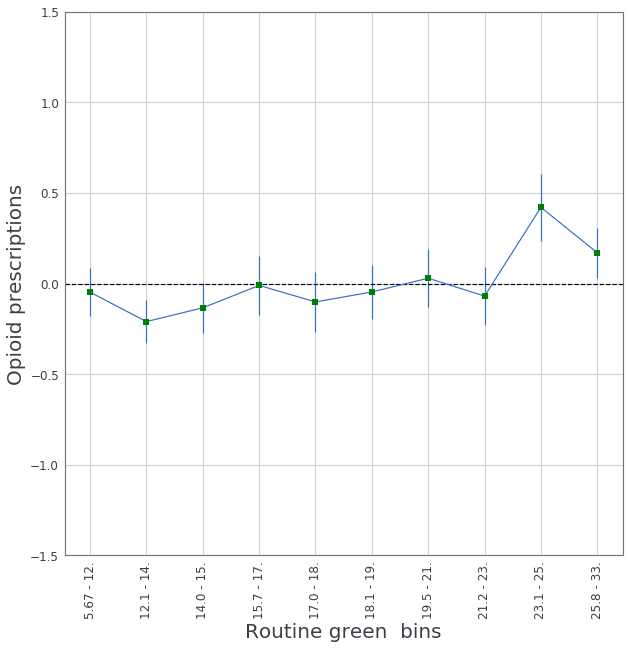

In [1874]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['opioid_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['opioid_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Routine green  bins' , fontsize = 20)
plt.ylabel('Opioid prescriptions',fontsize = 20)

In [2004]:
road_stats = {}
for name , group in data_analysis.groupby('on_road_beauty_bins'):
    road_stats[name] = {}
    road_stats[name]['diabetes_prevalence'] = np.mean(group['dm_Presc_per_capita'])
    road_stats[name]['diabetes_error'] = np.std(group['dm_Presc_per_capita'])/np.sqrt(len(group))
    road_stats[name]['hypertension_prevalence'] = np.mean(group['hyp_Presc_per_capita'])
    road_stats[name]['hypertension_error'] = np.std(group['hyp_Presc_per_capita'])/np.sqrt(len(group))
    road_stats[name]['depression_prevalence'] = np.mean(group['dep_Presc_per_capita'])
    road_stats[name]['depression_error'] = np.std(group['dep_Presc_per_capita'])/np.sqrt(len(group))

    road_stats[name]['crime_per_capita'] = np.mean(group['Crime_per_capita'])
    road_stats[name]['crime_error'] = np.std(group['Crime_per_capita'])/np.sqrt(len(group))
    road_stats[name]['street_crime_per_capita'] = np.mean(group['street_crime_per_capita'])
    road_stats[name]['street_crime_error'] = np.std(group['street_crime_per_capita'])/np.sqrt(len(group))
    road_stats[name]['off_street_crime_per_capita'] = np.mean(group['off_street_crime_per_capita'])
    road_stats[name]['off_street_crime_error'] = np.std(group['off_street_crime_per_capita'])/np.sqrt(len(group))
    
    road_stats[name]['beauty'] = np.mean(group['beauty_score'])
    road_stats[name]['beauty_error'] = np.std(group['beauty_score'])/np.sqrt(len(group))
    road_stats[name]['house_price'] = np.mean(group['Median_house_price'])
    road_stats[name]['house_price_error'] = np.std(group['Median_house_price'])/np.sqrt(len(group))
    road_stats[name]['IMD_avg'] = np.mean(group['IMD_avg'])
    road_stats[name]['IMD_avg_error'] = np.std(group['IMD_avg'])/np.sqrt(len(group))
    
    road_stats[name]['Wellbeing_avg'] = np.mean(group['Wellbeing'])
    road_stats[name]['Wellbeing_error'] = np.std(group['Wellbeing'])/np.sqrt(len(group))
    road_stats[name]['CH_obesity_avg'] = np.mean(group['Childhood obesity'])
    road_stats[name]['CH_obesity_error'] = np.std(group['Childhood obesity'])/np.sqrt(len(group))
    road_stats[name]['opioid_avg'] = np.mean(group['op_Presc_per_capita'])
    road_stats[name]['opioid_error'] = np.std(group['op_Presc_per_capita'])/np.sqrt(len(group))

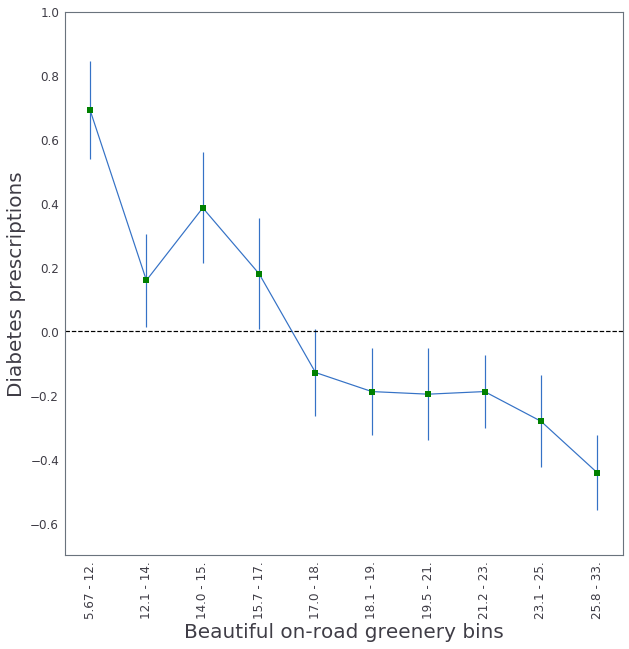

In [2005]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['diabetes_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['diabetes_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.grid(False)
plt.xlabel('Beautiful on-road greenery bins' , fontsize = 20)
plt.ylabel('Diabetes prescriptions',fontsize = 20)
plt.show()

Text(0, 0.5, 'Childhood obesity rates')

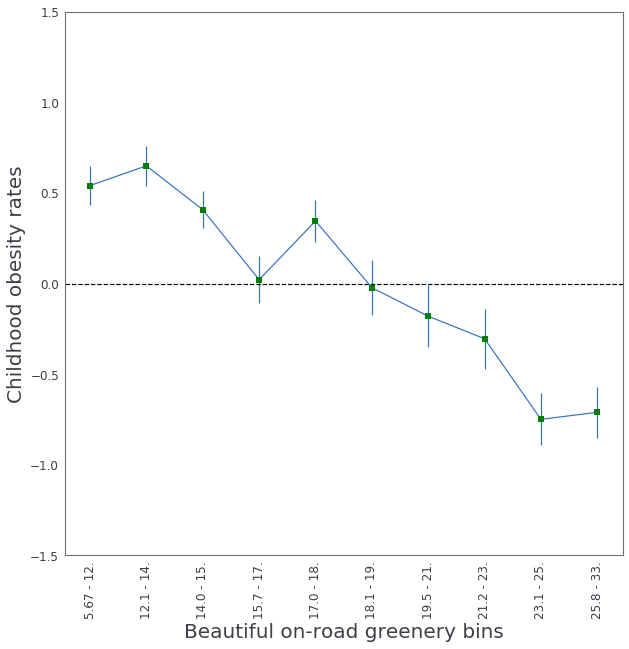

In [2006]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['CH_obesity_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['CH_obesity_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.grid(False)
plt.xlabel('Beautiful on-road greenery bins' , fontsize = 20)
plt.ylabel('Childhood obesity rates',fontsize = 20)

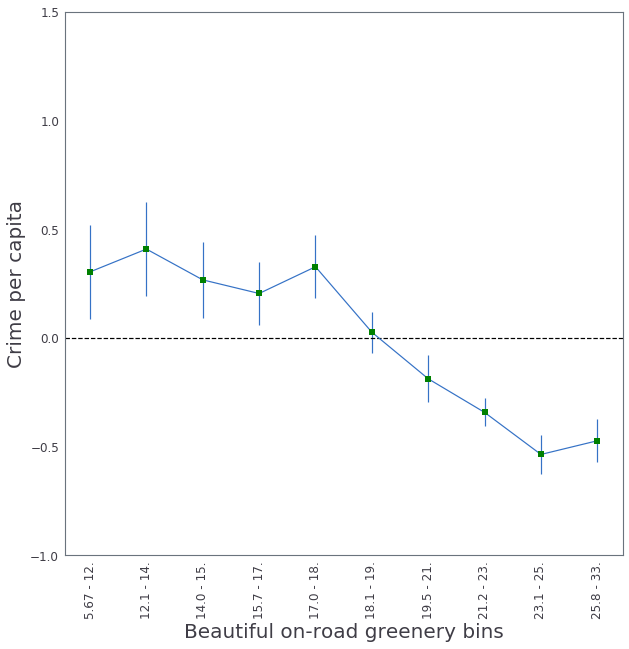

In [2007]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['crime_per_capita'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['crime_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.0, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.grid(False)
plt.xlabel('Beautiful on-road greenery bins' , fontsize = 20)
plt.ylabel('Crime per capita',fontsize = 20)
plt.show()

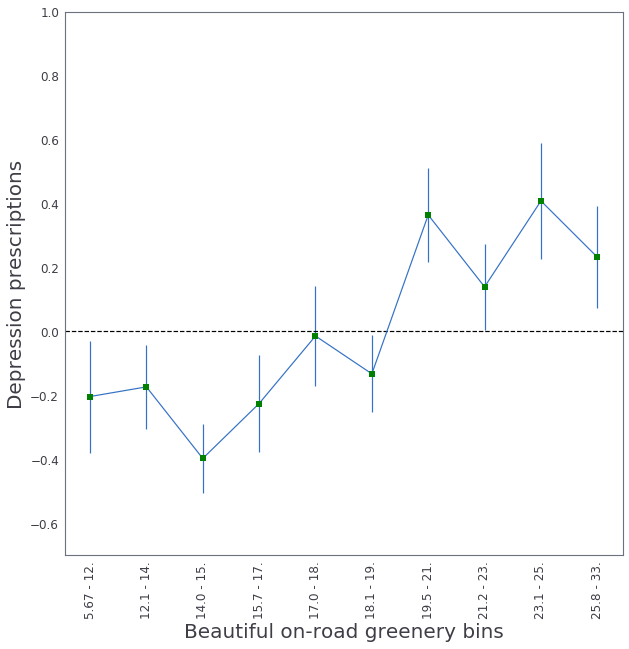

In [2008]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['depression_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['depression_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.grid(False)
plt.xlabel('Beautiful on-road greenery bins' , fontsize = 20)
plt.ylabel('Depression prescriptions',fontsize = 20)
plt.show()

Text(0, 0.5, 'Average Subjective wellbeing')

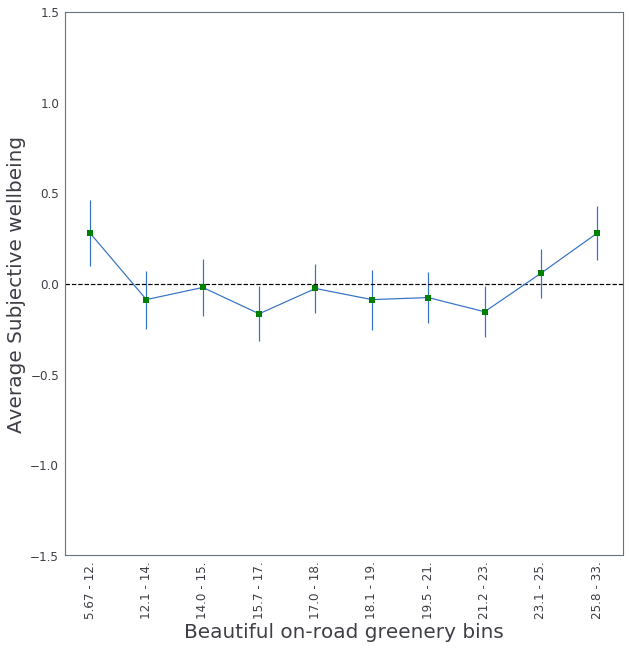

In [2009]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['Wellbeing_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['Wellbeing_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.grid(False)
plt.xlabel('Beautiful on-road greenery bins' , fontsize = 20)
plt.ylabel('Average Subjective wellbeing',fontsize = 20)

In [1880]:
road_stats = {}
for name , group in data_analysis.groupby('off_road_bins'):
    road_stats[name] = {}
    road_stats[name]['diabetes_prevalence'] = np.mean(group['dm_Presc_per_capita'])
    road_stats[name]['diabetes_error'] = np.std(group['dm_Presc_per_capita'])/np.sqrt(len(group))
    road_stats[name]['hypertension_prevalence'] = np.mean(group['hyp_Presc_per_capita'])
    road_stats[name]['hypertension_error'] = np.std(group['hyp_Presc_per_capita'])/np.sqrt(len(group))
    road_stats[name]['depression_prevalence'] = np.mean(group['dep_Presc_per_capita'])
    road_stats[name]['depression_error'] = np.std(group['dep_Presc_per_capita'])/np.sqrt(len(group))

    road_stats[name]['crime_per_capita'] = np.mean(group['Crime_per_capita'])
    road_stats[name]['crime_error'] = np.std(group['Crime_per_capita'])/np.sqrt(len(group))
    road_stats[name]['street_crime_per_capita'] = np.mean(group['street_crime_per_capita'])
    road_stats[name]['street_crime_error'] = np.std(group['street_crime_per_capita'])/np.sqrt(len(group))
    road_stats[name]['off_street_crime_per_capita'] = np.mean(group['off_street_crime_per_capita'])
    road_stats[name]['off_street_crime_error'] = np.std(group['off_street_crime_per_capita'])/np.sqrt(len(group))
    
    road_stats[name]['beauty'] = np.mean(group['beauty_score'])
    road_stats[name]['beauty_error'] = np.std(group['beauty_score'])/np.sqrt(len(group))
    road_stats[name]['house_price'] = np.mean(group['Median_house_price'])
    road_stats[name]['house_price_error'] = np.std(group['Median_house_price'])/np.sqrt(len(group))
    road_stats[name]['IMD_avg'] = np.mean(group['IMD_avg'])
    road_stats[name]['IMD_avg_error'] = np.std(group['IMD_avg'])/np.sqrt(len(group))
    
    road_stats[name]['Wellbeing_avg'] = np.mean(group['Wellbeing'])
    road_stats[name]['Wellbeing_error'] = np.std(group['Wellbeing'])/np.sqrt(len(group))
    road_stats[name]['CH_obesity_avg'] = np.mean(group['Childhood obesity'])
    road_stats[name]['CH_obesity_error'] = np.std(group['Childhood obesity'])/np.sqrt(len(group))
    road_stats[name]['opioid_avg'] = np.mean(group['op_Presc_per_capita'])
    road_stats[name]['opioid_error'] = np.std(group['op_Presc_per_capita'])/np.sqrt(len(group))

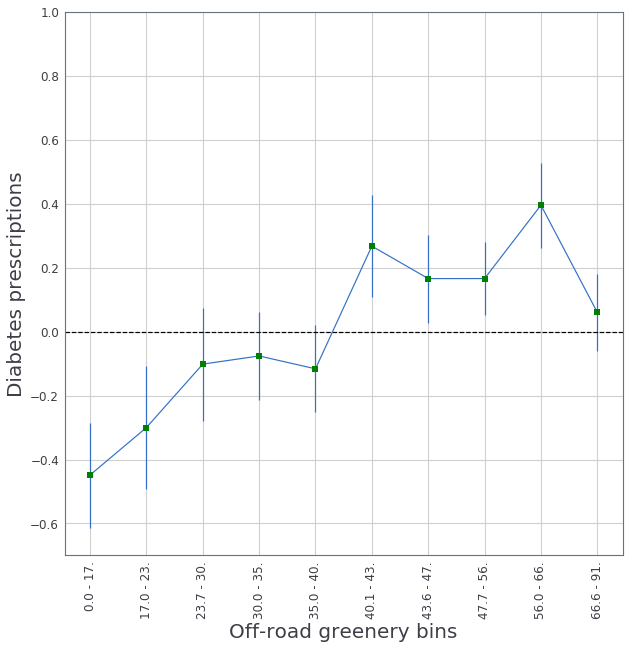

In [1881]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['diabetes_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['diabetes_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-road greenery bins' , fontsize = 20)
plt.ylabel('Diabetes prescriptions',fontsize = 20)
plt.show()

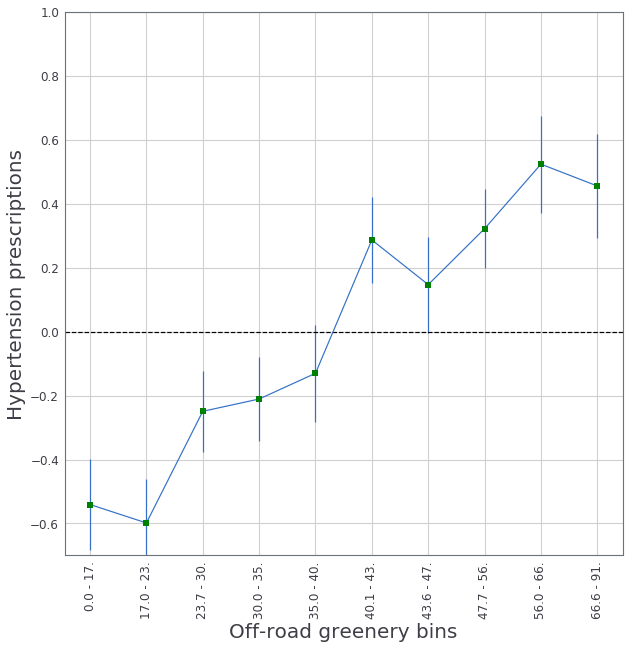

In [1882]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['hypertension_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['hypertension_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-road greenery bins' , fontsize = 20)
plt.ylabel('Hypertension prescriptions',fontsize = 20)
plt.show()

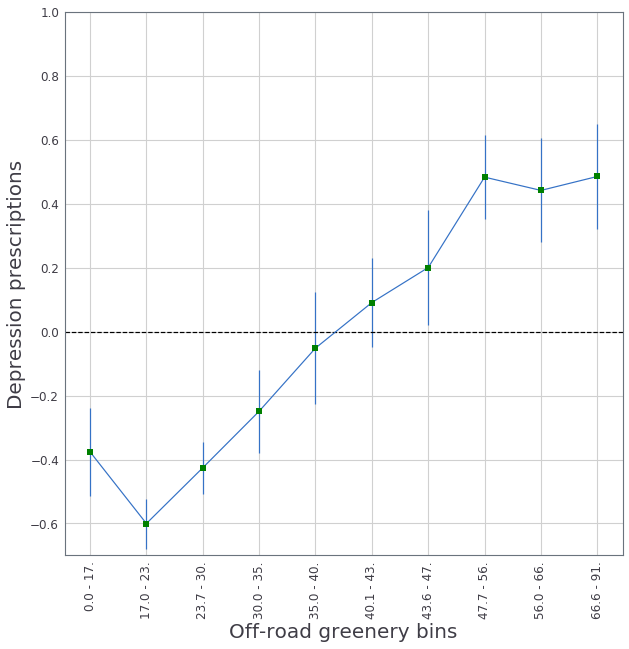

In [1883]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['depression_prevalence'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['depression_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-.7, 1.0)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-road greenery bins' , fontsize = 20)
plt.ylabel('Depression prescriptions',fontsize = 20)
plt.show()

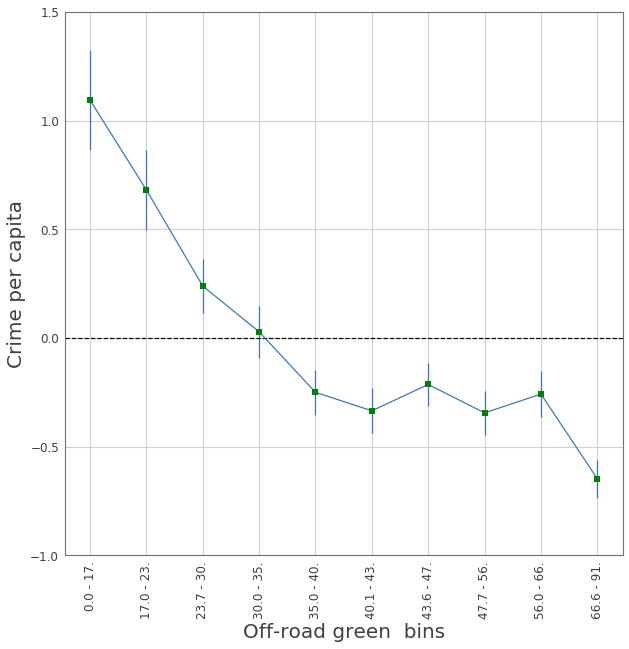

In [1884]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['crime_per_capita'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['crime_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.0, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-road green  bins' , fontsize = 20)
plt.ylabel('Crime per capita',fontsize = 20)
plt.show()

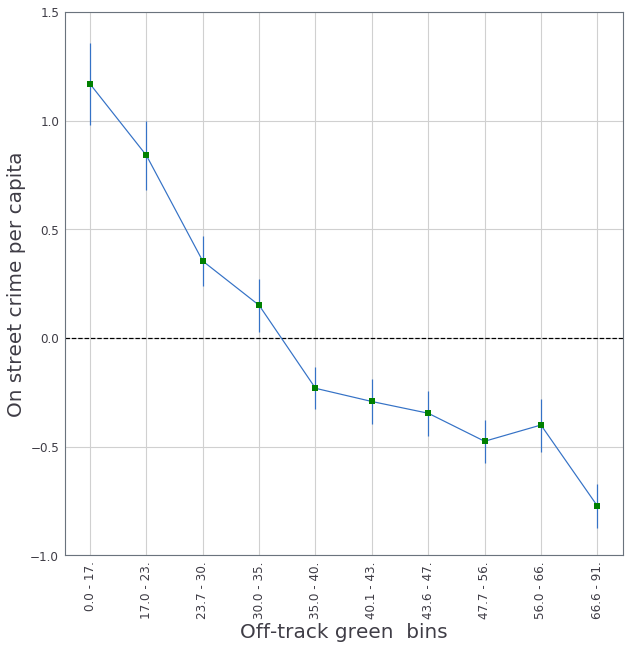

In [1885]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['street_crime_per_capita'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['street_crime_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.0, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-track green  bins' , fontsize = 20)
plt.ylabel('On street crime per capita',fontsize = 20)
plt.show()

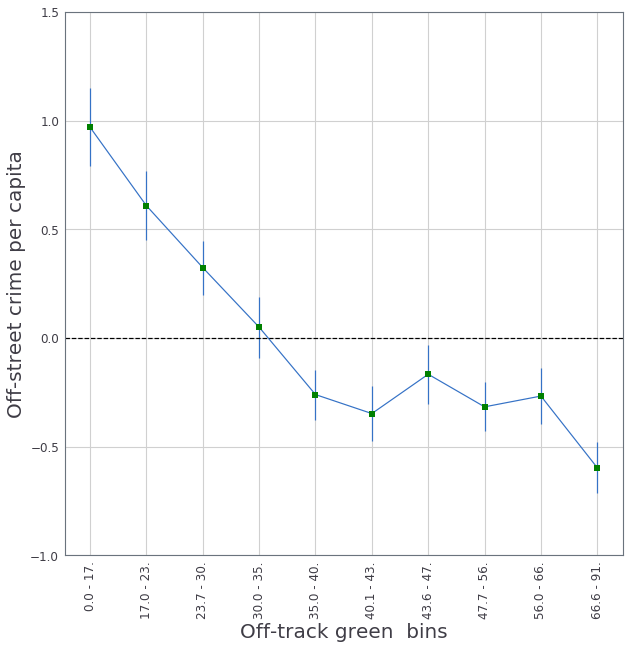

In [1886]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['off_street_crime_per_capita'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['off_street_crime_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.0, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-track green  bins' , fontsize = 20)
plt.ylabel('Off-street crime per capita',fontsize = 20)
plt.show()

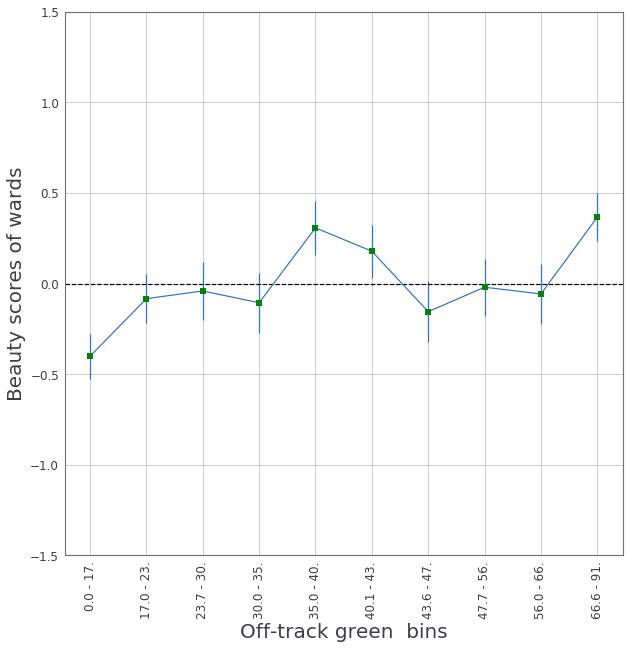

In [1887]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['beauty'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['beauty_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-track green  bins' , fontsize = 20)
plt.ylabel('Beauty scores of wards',fontsize = 20)
plt.show()

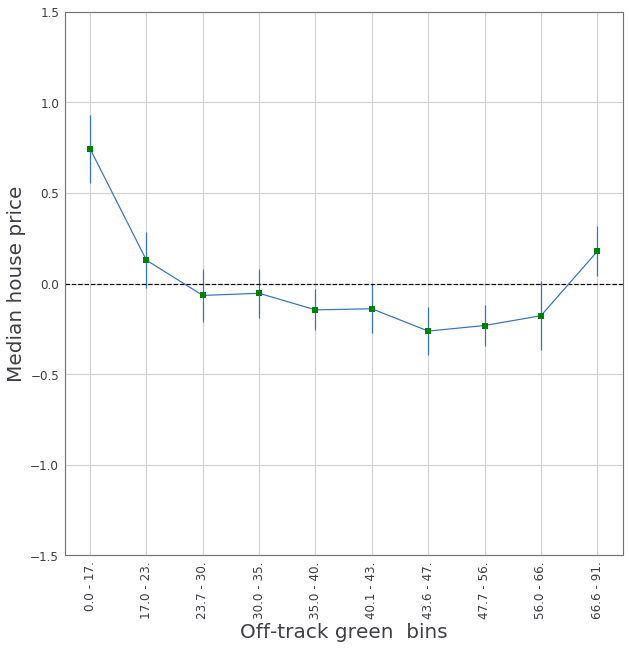

In [1888]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['house_price'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['house_price_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-track green  bins' , fontsize = 20)
plt.ylabel('Median house price',fontsize = 20)
plt.show()

Text(0, 0.5, 'Average IMD score')

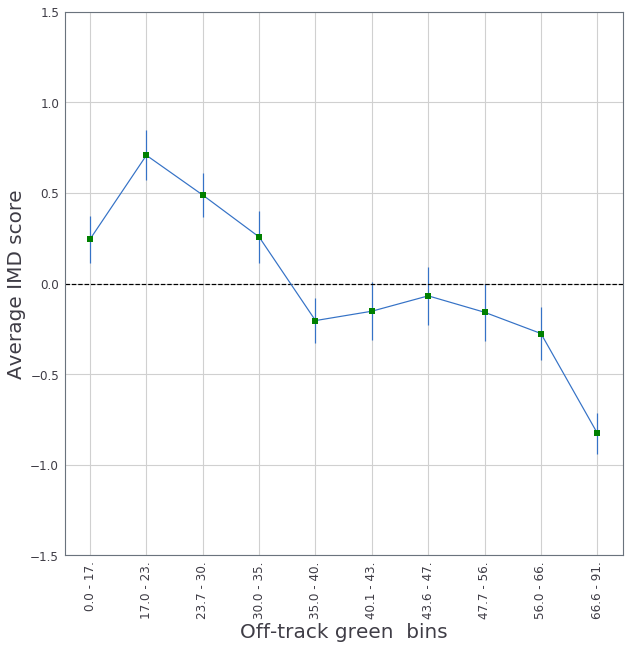

In [1889]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['IMD_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['IMD_avg_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , offTrack_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-track green  bins' , fontsize = 20)
plt.ylabel('Average IMD score',fontsize = 20)

Text(0, 0.5, 'Average Subjective wellbeing')

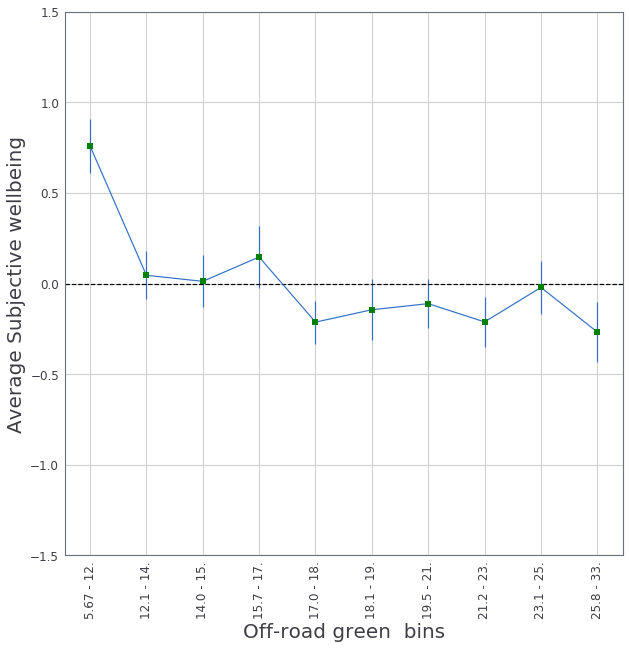

In [1890]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['Wellbeing_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['Wellbeing_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-road green  bins' , fontsize = 20)
plt.ylabel('Average Subjective wellbeing',fontsize = 20)

Text(0, 0.5, 'Childhood obesity rates')

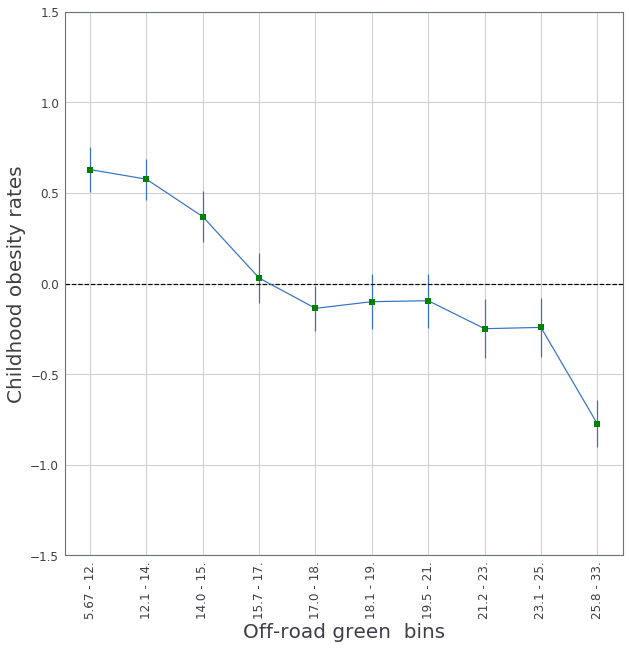

In [1891]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['CH_obesity_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['CH_obesity_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-road green  bins' , fontsize = 20)
plt.ylabel('Childhood obesity rates',fontsize = 20)

Text(0, 0.5, 'Opioid prescriptions')

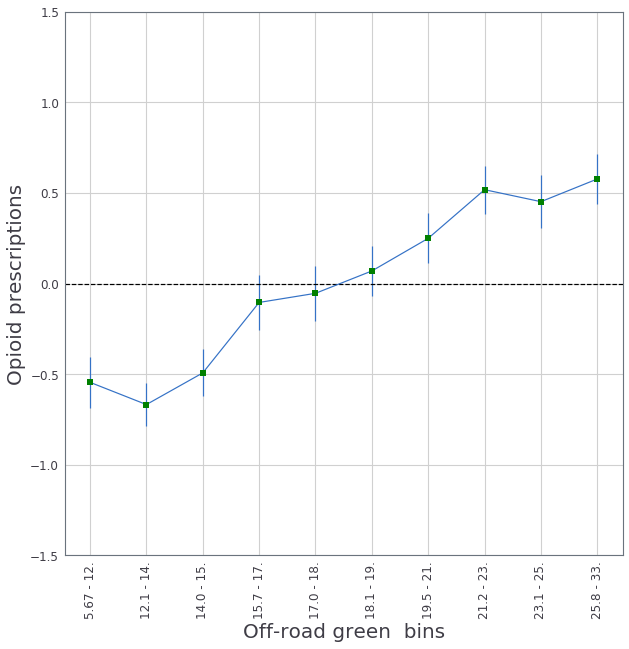

In [1892]:
x = []
y = []
err = []
bin_count = 1
for k in road_stats:
    y.append(road_stats[k]['opioid_avg'])
    x.append(str(bin_count))
    bin_count+=1
    err.append(road_stats[k]['opioid_error'])
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.errorbar(x, y , yerr = err ,marker='s', mfc='red',
         mec='green', ms=2, mew=4)
plt.ylim(-1.5, 1.5)
ax.axhline(0.0, ls='--',color='black')
plt.xticks( x , routine_bins_labels ,fontsize=12 , rotation = 90)
plt.yticks(fontsize=12)
plt.xlabel('Off-road green  bins' , fontsize = 20)
plt.ylabel('Opioid prescriptions',fontsize = 20)

[Text(0, 0.5, 'Routine Green'),
 Text(0, 1.5, 'Off-road Green'),
 Text(0, 2.5, 'Median income*'),
 Text(0, 3.5, 'Crime per capita*'),
 Text(0, 4.5, 'Population density*'),
 Text(0, 5.5, 'Average age'),
 Text(0, 6.5, 'IMD'),
 Text(0, 7.5, 'Hypertension prescriptions'),
 Text(0, 8.5, 'Diabetes prescriptions'),
 Text(0, 9.5, 'Depression prescriptions'),
 Text(0, 10.5, 'Opioid prescriptions'),
 Text(0, 11.5, 'beauty_score'),
 Text(0, 12.5, 'beauty_routine_green'),
 Text(0, 13.5, 'Median house price'),
 Text(0, 14.5, 'Wellbeing'),
 Text(0, 15.5, 'Childhood obesity')]

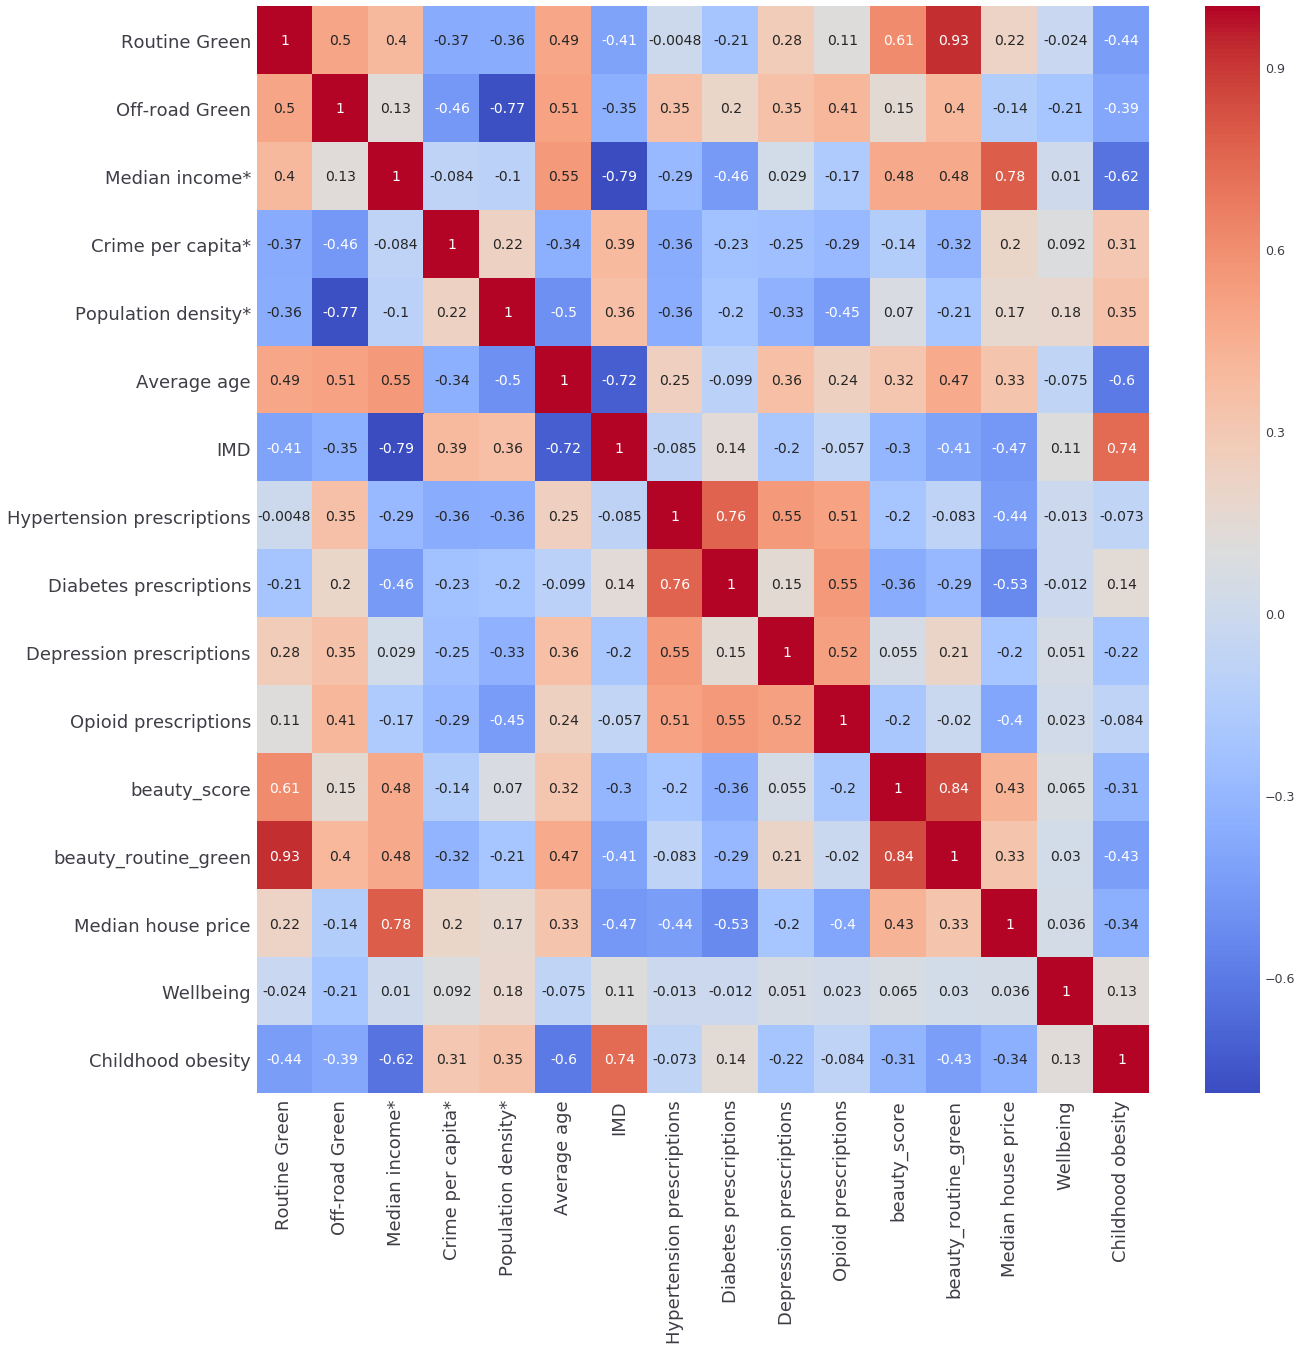

In [1893]:
# dims = ['green_gsv','sat_all_ward_green','Population_per_square_kilometre','log_median_income' ,'Crime_per_capita' , 'Street_crime_per_capita' ,'diabetes_Prevalence','log_pop_density']

# ['Crime_per_capita','off_street_crime_per_capita','street_crime_per_capita','green_gsv','mean_choice','median_choice','sat_all_ward_green','Population_per_square_kilometre','IMD_avg', 'Wellbeing','Childhood obesity' ,
#                        'Income score','Median 2012/13','diabetes_Prevalence','hyp_Presc_per_capita', 'dm_Presc_per_capita', 'dep_Presc_per_capita','op_Presc_per_capita' ,'log_median_income','log_pop_density' , 'avg_age', 'beauty_score' , 'Median_house_price']
dims = ['green_gsv','sat_all_ward_green','log_median_income' ,'Crime_per_capita','log_pop_density','avg_age','IMD_avg','hyp_Presc_per_capita','dm_Presc_per_capita',
       'dep_Presc_per_capita','op_Presc_per_capita','beauty_score' , 'beauty_routine_green','Median_house_price' , 'Wellbeing', 'Childhood obesity']
feats = data_analysis[dims].copy()
# feats.rename(columns={'green_gsv':'Routine green' , 'sat_all_ward_green': 'Off track green'  , 'Population_per_square_kilometre' : 'Population density', 'log_pop_density' : 'Population density*',
#                       'log_median_income' : 'Median income*' , 'Crime_per_capita':'Crime per capita*' , 'Street_crime_per_capita':'Street crime per capita*' ,'diabetes_Prevalence' : 'Diabetes prescriptions'},inplace=True)
feats.rename(columns={'green_gsv':'Routine Green' , 'sat_all_ward_green': 'Off-road Green'  , 'log_pop_density' : 'Population density*',
                      'log_median_income' : 'Median income*' , 'Crime_per_capita':'Crime per capita*' , 'dm_Presc_per_capita' : 'Diabetes prescriptions', 'op_Presc_per_capita' : 'Opioid prescriptions', 
                      'IMD_avg' :'IMD' , 'Median_house_price' : 'Median house price',
                      'dep_Presc_per_capita' : 'Depression prescriptions','hyp_Presc_per_capita' : 'Hypertension prescriptions'  ,'avg_age':'Average age'},inplace=True)
fig, ax = plt.subplots(figsize=(20,20))         
corr = feats.corr(method='pearson')
sns.heatmap(corr, annot=True , ax=ax ,cmap='coolwarm' , annot_kws={"fontsize":14}  )
ax.set_xticklabels(corr.columns, fontsize=18 , rotation = 90)
ax.set_yticklabels(corr.columns, fontsize=18, rotation = 0)

[Text(0, 0.5, 'Routine Green'),
 Text(0, 1.5, 'Off-road Green'),
 Text(0, 2.5, 'Median income*'),
 Text(0, 3.5, 'Population density*'),
 Text(0, 4.5, 'Average age'),
 Text(0, 5.5, 'Crime per capita*'),
 Text(0, 6.5, 'Diabetes prescriptions'),
 Text(0, 7.5, 'Opioid prescriptions'),
 Text(0, 8.5, 'Wellbeing'),
 Text(0, 9.5, 'Childhood obesity')]

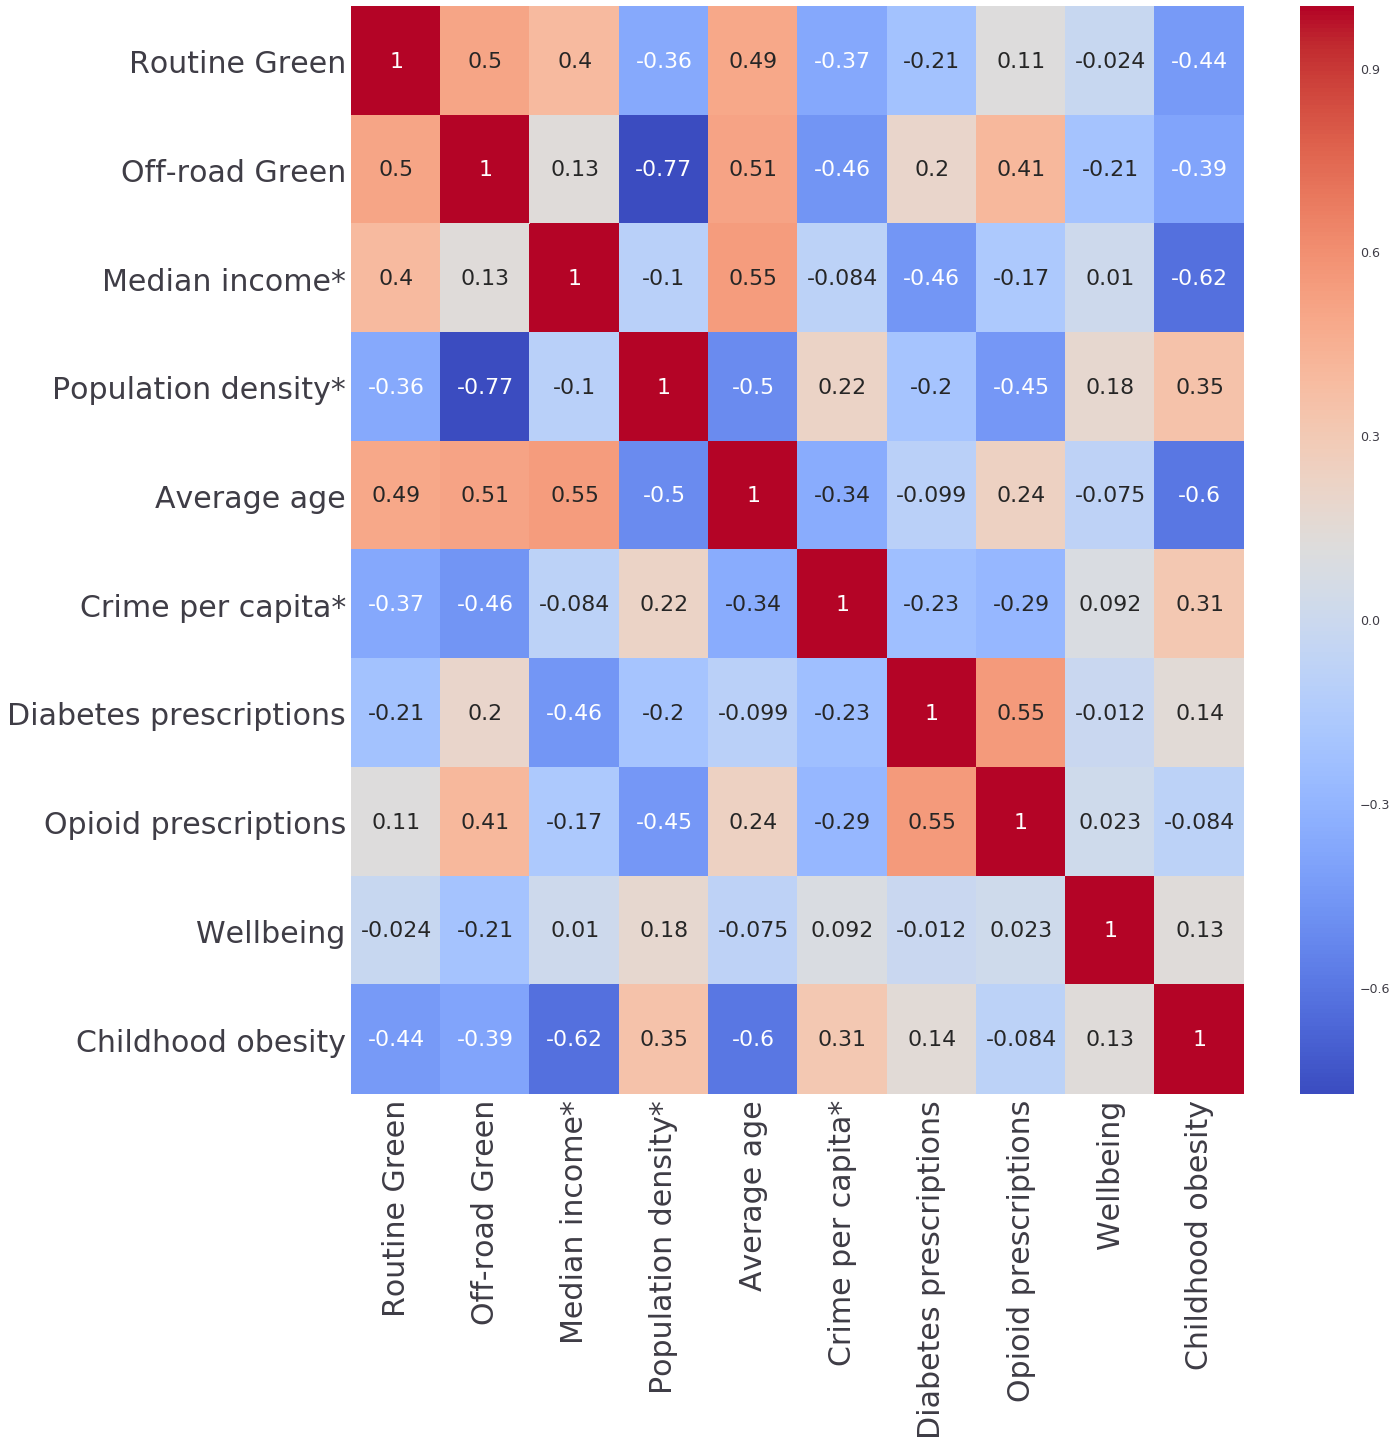

In [1899]:
predictors = ['green_gsv','sat_all_ward_green','log_median_income' ,'log_pop_density','avg_age' , 'Crime_per_capita' ,'dm_Presc_per_capita' , 'op_Presc_per_capita', 'Wellbeing', 'Childhood obesity']
predfeats = data_analysis[predictors].copy()
predfeats.rename(columns={'green_gsv':'Routine Green' , 'sat_all_ward_green': 'Off-road Green'  , 'log_pop_density' : 'Population density*',
                      'log_median_income' : 'Median income*' , 'Crime_per_capita':'Crime per capita*' , 'dm_Presc_per_capita' : 'Diabetes prescriptions', 'op_Presc_per_capita' : 'Opioid prescriptions', 
                       'Median_house_price' : 'Median house price',
                      'dep_Presc_per_capita' : 'Depression prescriptions','hyp_Presc_per_capita' : 'Hypertension prescriptions'  ,'avg_age':'Average age'},inplace=True)

fig, ax = plt.subplots(figsize=(20,20))         
corr = predfeats.corr(method='pearson')
sns.heatmap(corr, annot=True , ax=ax ,cmap='coolwarm' , annot_kws={"fontsize":22}  )
ax.set_xticklabels(corr.columns, fontsize=30 , rotation = 90)
ax.set_yticklabels(corr.columns, fontsize=30, rotation = 0)

In [1900]:
# dims = ['green_gsv','sat_all_ward_green','log_median_income' ,'Crime_per_capita', 'off_street_crime_per_capita' , 'street_crime_per_capita','log_pop_density','avg_age','IMD_avg','hyp_Presc_per_capita','dm_Presc_per_capita',
#        'dep_Presc_per_capita','beauty_score' , 'Median_house_price']

dims = ['green_gsv','sat_all_ward_green','log_median_income' ,'Crime_per_capita','log_pop_density','avg_age','IMD_avg','op_Presc_per_capita','dm_Presc_per_capita',
        'Wellbeing', 'Childhood obesity']

In [1901]:
data_analysis.columns

Index(['Crime_per_capita', 'off_street_crime_per_capita',
       'street_crime_per_capita', 'green_gsv', 'mean_choice', 'median_choice',
       'sat_all_ward_green', 'Population_per_square_kilometre', 'IMD_avg',
       'Wellbeing', 'Childhood obesity', 'Income score', 'Median 2012/13',
       'diabetes_Prevalence', 'hyp_Presc_per_capita', 'dm_Presc_per_capita',
       'dep_Presc_per_capita', 'op_Presc_per_capita', 'log_median_income',
       'log_pop_density', 'avg_age', 'beauty_score', 'beauty_routine_green',
       'Median_house_price', 'on_road_bins', 'off_road_bins', 'beauty_bins',
       'on_road_beauty_bins', 'income_bin', 'density_bin'],
      dtype='object')

Feature green_gsv: 0.166540
Feature sat_all_ward_green: 0.135733
Feature log_median_income: 0.424141
Feature log_pop_density: 0.099247
Feature avg_age: 0.296274
Feature IMD_avg: 0.402869


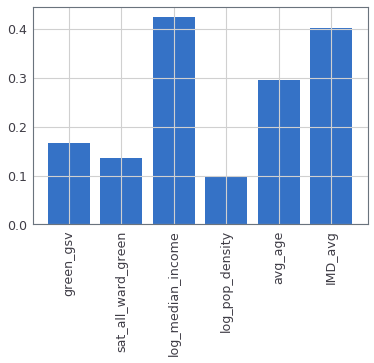

R2: 0.516


In [1902]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# outcome = ['Crime_per_capita']
# outcome = ['dm_Presc_per_capita']
# outcome = ['dep_Presc_per_capita']
# outcome = ['hyp_Presc_per_capita']
# outcome = ['Wellbeing']
outcome = ['Childhood obesity']

predictors = ['green_gsv','sat_all_ward_green','log_median_income' ,'log_pop_density','avg_age','IMD_avg']



data_frame = data_analysis[dims].copy()

y = data_frame.pop(outcome[0])
X = data_frame[predictors].copy()

X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.2)


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (predictors[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(np.arange(0,len(predictors),1) , predictors , rotation = 90)
pyplot.show()



model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
R2 = r2_score(y_test, yhat)
print('R2: %.3f' % R2)


In [1992]:

base = ['log_pop_density' ,'log_median_income','avg_age' ]
# base = ['log_pop_density' ,'IMD_avg'   ]
# base = ['log_pop_density' ,'log_median_income' ]
# base = ['IMD average score']
terms = []
interactions = [('sat_all_ward_green','Population_per_square_kilometre'),('sat_all_ward_green','log_pop_density'),('sat_all_ward_green','log_median_income') , 
                ('green_gsv','sat_all_ward_green') ,('green_gsv','Population_per_square_kilometre'), ('green_gsv','log_pop_density') ,('green_gsv','log_median_income'),
               ('median_choice','Population_per_square_kilometre'),('median_choice','log_pop_density'),('median_choice','log_median_income'),
                ('median_choice','sat_all_ward_green') , ('median_choice','green_gsv')]
for index , i in enumerate(interactions):
    sampled = data_analysis[[i[0] , i[1]]]
    normalized_sampled = (sampled-sampled.min())/(sampled.max()-sampled.min())
    data_analysis[str(i[0])+'*'+str(i[1])] = normalized_sampled[i[0]] * normalized_sampled[i[1]]
    terms.append(str(i[0])+'*'+str(i[1]))

print (terms)
M1 = base + ['sat_all_ward_green'] + ['sat_all_ward_green*log_pop_density']
M3 = base + ['sat_all_ward_green','green_gsv'] + ['sat_all_ward_green*log_pop_density'] +  ['green_gsv*log_pop_density', 'green_gsv*log_median_income'] + ['green_gsv*sat_all_ward_green']
M5 = base + ['sat_all_ward_green','green_gsv','median_choice'] + ['sat_all_ward_green*log_pop_density'] +  ['green_gsv*log_pop_density', 'green_gsv*log_median_income'] + ['green_gsv*sat_all_ward_green'] + ['median_choice*log_pop_density', 'median_choice*sat_all_ward_green']
M6 = base + ['sat_all_ward_green','green_gsv','median_choice','on_vs_off_green_ratio'] +['green_gsv*log_pop_density' , 'green_gsv*log_median_income'] + ['sat_all_ward_green*log_pop_density', 'sat_all_ward_green*log_median_income']  + ['green_gsv*sat_all_ward_green'] + ['median_choice*log_pop_density','median_choice*log_median_income'] + ['median_choice*green_gsv','median_choice*sat_all_ward_green'] + ['on_vs_off_green_ratio*log_median_income','on_vs_off_green_ratio*log_pop_density'] + ['on_vs_off_green_ratio*green_gsv','on_vs_off_green_ratio*sat_all_ward_green']



# outcome = ['Crime_per_capita']
# outcome = ['dm_Presc_per_capita']
# outcome = ['op_Presc_per_capita']
outcome = ['Childhood obesity']
# outcome = ['Wellbeing']

# outcome = ['dep_Presc_per_capita']
# outcome = ['hyp_Presc_per_capita']


    
    


['sat_all_ward_green*Population_per_square_kilometre', 'sat_all_ward_green*log_pop_density', 'sat_all_ward_green*log_median_income', 'green_gsv*sat_all_ward_green', 'green_gsv*Population_per_square_kilometre', 'green_gsv*log_pop_density', 'green_gsv*log_median_income', 'median_choice*Population_per_square_kilometre', 'median_choice*log_pop_density', 'median_choice*log_median_income', 'median_choice*sat_all_ward_green', 'median_choice*green_gsv']


In [1993]:
R2s = []

In [1994]:
features = base
Y_dim = outcome
Y = np.array(data_analysis[Y_dim].values,dtype=np.float32)
X = np.array(data_analysis[features].values,dtype=np.float32)
X = sm.add_constant(X)
print(features)
model_IMD = sm.OLS(Y, X).fit()
R2s.append(model_IMD.rsquared_adj)
model_IMD.summary(xname=['intercept']+features, yname =  outcome[0])

['log_pop_density', 'log_median_income', 'avg_age']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Childhood obesity   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     141.1
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           3.32e-63
Time:                        09:20:28   Log-Likelihood:                -452.50
No. Observations:                 423   AIC:                             913.0
Df Residuals:                     419   BIC:                             929.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept          -2.97e-10      0.034  -8.62e-09      1.000      -0.068       0.068
log_pop_density       0.1715      0.041      4.172      0.000       0.091       0.252
log_median_income    -0.4685      0.043    -11.023      0.000      -0.552      -0.385
avg_age              -0.2523      0.049     -5.154      0.000      -0.348      -0.156
==============================================================================
Omnibus:                       41.047   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.772
Skew:                           0.502   Prob(JB):                     9.69e-22
Kurtosis:                       5.117   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1995]:
features = M1
Y_dim = outcome
Y = np.array(data_analysis[Y_dim].values,dtype=np.float32)
X = np.array(data_analysis[features].values,dtype=np.float32)
X = sm.add_constant(X)
print(features)
model_IMD = sm.OLS(Y, X).fit()
R2s.append(model_IMD.rsquared_adj)
model_IMD.summary(xname=['intercept']+features, yname =  outcome[0])

['log_pop_density', 'log_median_income', 'avg_age', 'sat_all_ward_green', 'sat_all_ward_green*log_pop_density']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Childhood obesity   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     93.74
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           5.45e-66
Time:                        09:20:29   Log-Likelihood:                -440.89
No. Observations:                 423   AIC:                             893.8
Df Residuals:                     417   BIC:                             918.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
intercept                              0.7709      0.213      3.627      0.000       0.353       1.189
log_pop_density                        0.2675      0.080      3.357      0.001       0.111       0.424
log_median_income                     -0.4871      0.042    -11.702      0.000      -0.569      -0.405
avg_age                               -0.2407      0.049     -4.889      0.000      -0.337      -0.144
sat_all_ward_green                     0.1757      0.109      1.608      0.109      -0.039       0.390
sat_all_ward_green*log_pop_density    -3.0585      0.833     -3.673      0.000      -4.695      -1.422
==============================================================================
Omnibus:                       27.943   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.611
Skew:                           0.396   Prob(JB):                     2.28e-12
Kurtosis:                       4.554   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1996]:
features = M3
Y_dim = outcome
Y = np.array(data_analysis[Y_dim].values,dtype=np.float32)
X = np.array(data_analysis[features].values,dtype=np.float32)
X = sm.add_constant(X)
print(features)
model_IMD = sm.OLS(Y, X).fit()
R2s.append(model_IMD.rsquared_adj)
model_IMD.summary(xname=['intercept']+features, yname =  outcome[0])

['log_pop_density', 'log_median_income', 'avg_age', 'sat_all_ward_green', 'green_gsv', 'sat_all_ward_green*log_pop_density', 'green_gsv*log_pop_density', 'green_gsv*log_median_income', 'green_gsv*sat_all_ward_green']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Childhood obesity   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     57.23
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           3.60e-67
Time:                        09:20:29   Log-Likelihood:                -428.98
No. Observations:                 423   AIC:                             878.0
Df Residuals:                     413   BIC:                             918.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
intercept                             -1.1414      0.790     -1.445      0.149      -2.694       0.411
log_pop_density                       -0.1461      0.137     -1.065      0.287      -0.416       0.123
log_median_income                     -0.3267      0.093     -3.530      0.000      -0.509      -0.145
avg_age                               -0.2280      0.049     -4.664      0.000      -0.324      -0.132
sat_all_ward_green                     0.1840      0.178      1.033      0.302      -0.166       0.534
green_gsv                             -1.0139      0.329     -3.079      0.002      -1.661      -0.366
sat_all_ward_green*log_pop_density    -4.7954      1.025     -4.678      0.000      -6.810      -2.780
green_gsv*log_pop_density              7.2281      1.865      3.875      0.000       3.561      10.895
green_gsv*log_median_income           -2.3142      1.195     -1.937      0.053      -4.662       0.034
green_gsv*sat_all_ward_green           2.9693      1.334      2.226      0.027       0.348       5.591
==============================================================================
Omnibus:                       21.905   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.243
Skew:                           0.347   Prob(JB):                     8.18e-09
Kurtosis:                       4.277   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

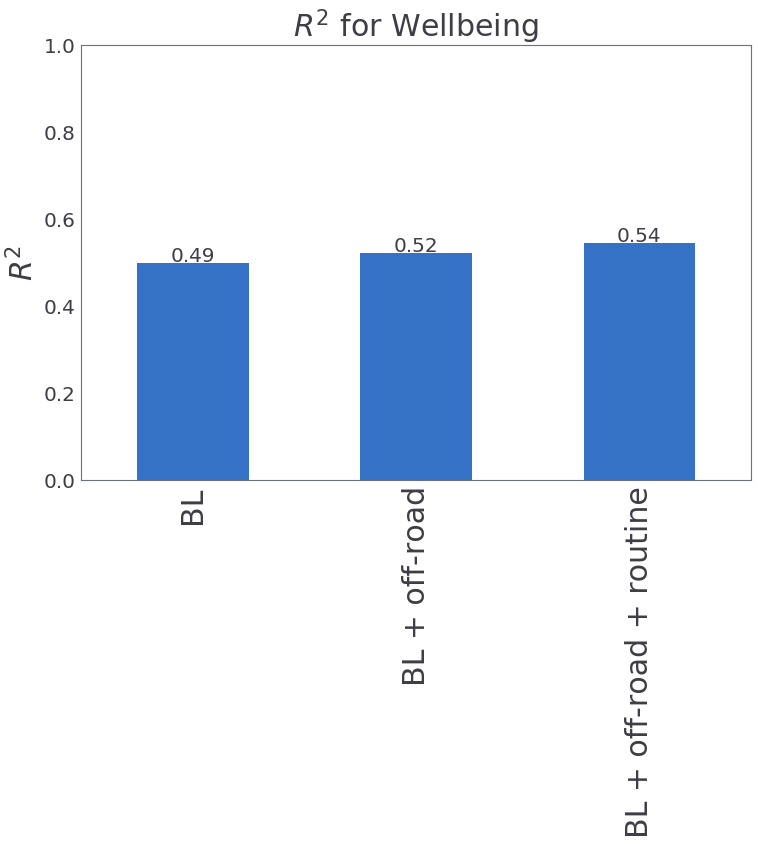

In [1997]:
Y = R2s
R2_series = pd.Series.from_array(Y)
X_labels = ['BL','BL + off-road', 'BL + off-road + routine', 'BL + Off + On + Choice' ]
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = R2_series.plot(kind='bar')
plt.grid(False)
for p in ax.patches:
    ax.annotate(str(p.get_height())[:4], (p.get_x() + 0.15 , p.get_height() * 1.005),fontsize = 20)
plt.ylim(0.0, 1.0)
# ax.set_title('$R^2$ for Crime per 1000',fontsize=30)
# ax.set_title('$R^2$ for Diabetes prescriptions',fontsize=30)
# ax.set_title('$R^2$ for Opioid prescriptions',fontsize=30)
# ax.set_title('$R^2$ for Childhood obesity models',fontsize=30)
ax.set_title('$R^2$ for Wellbeing',fontsize=30)
ax.set_ylabel('$R^2$',fontsize=30)
ax.set_xticklabels(X_labels,fontsize=30)
plt.yticks(fontsize=20)
